# <center><strong>Obesity risk</strong></center>

-----------------------------------

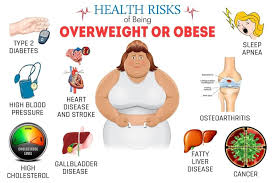

In [95]:
from IPython.display import Image, display
display(Image(filename='obesity-Risk-Photo.jpg', width=900))

----------------------------

## <center><strong>Project Overview </strong></center>

### **This Kaggle dataset provides comprehensive information on individuals, encompassing key attributes such as gender, age, height, weight, family history with overweight, dietary habits, physical activity, transportation mode, and the corresponding obesity level. The dataset is meticulously curated for research and analysis in the domain of health and lifestyle studies.nting obesity level**

--------------------------------------
--------------------------------------
--------------------------------------

## **Import Libraries**

-------------------------

In [96]:
from pandas import read_csv, concat
from matplotlib.pyplot import show, tight_layout, subplots, figure, title, xlabel, ylabel, grid
from seaborn import kdeplot, heatmap, boxplot, regplot, countplot, histplot

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_validate, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import CalibratedClassifierCV

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, balanced_accuracy_score, cohen_kappa_score
from sklearn.inspection import permutation_importance

from pickle import dump

import numpy as np
import json

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

--------------------------------
--------------------------------
-------------------------------

## **Exploratory Data Analysis (EDA)**

### **Initial Data Understanding**

 - **Data loading and Inspection**
 - **Data Types**
 - **Missing Values**
 - **Duplicates**

------------------------

In [97]:
train_df= read_csv('train_obesity.csv')

In [98]:
train_df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [99]:
train_df.sample(10)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
11551,11551,Female,22.679935,1.645511,82.412665,yes,yes,1.123672,2.100918,Sometimes,no,2.000000,no,0.128548,1.281141,no,Public_Transportation,Obesity_Type_I
15227,15227,Female,25.879411,1.627567,104.592372,yes,yes,3.000000,3.000000,Sometimes,no,1.567366,no,0.139159,0.527766,Sometimes,Public_Transportation,Obesity_Type_III
13605,13605,Male,28.255199,1.819557,97.959899,yes,yes,2.000000,3.000000,Sometimes,no,3.000000,no,1.096556,1.011983,no,Walking,Overweight_Level_II
13905,13905,Male,23.000000,1.700000,70.000000,no,yes,2.000000,3.000000,Sometimes,no,2.000000,no,1.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2455,2455,Male,27.931432,1.750000,119.087557,yes,yes,2.425503,3.000000,Sometimes,no,2.017602,no,1.593183,0.001640,Sometimes,Public_Transportation,Obesity_Type_II
8328,8328,Female,26.000000,1.641601,111.949972,yes,yes,3.000000,3.000000,Sometimes,no,2.638896,no,0.000000,0.162494,Sometimes,Public_Transportation,Obesity_Type_III
11706,11706,Male,30.916426,1.775580,120.589419,yes,yes,2.113843,3.000000,Sometimes,no,2.316069,no,0.691369,1.416353,Sometimes,Automobile,Obesity_Type_II
305,305,Female,39.129291,1.554728,80.000000,yes,yes,2.000000,3.000000,Sometimes,no,1.000000,no,0.000000,0.000000,Sometimes,Automobile,Obesity_Type_I
16804,16804,Male,30.607546,1.829757,118.363376,yes,yes,2.736647,3.000000,Sometimes,no,1.705218,no,0.647632,0.395468,Sometimes,Public_Transportation,Obesity_Type_II
346,346,Female,18.000000,1.650000,56.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,3.000000,0.000000,Sometimes,Automobile,Normal_Weight


In [100]:
train_df.tail()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II
20757,20757,Male,26.680376,1.816547,118.134898,yes,yes,3.000000,3.000000,Sometimes,no,2.003563,no,0.684487,0.713823,Sometimes,Public_Transportation,Obesity_Type_II


In [101]:
train_df.shape

(20758, 18)

In [102]:
train_df.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [103]:
# Changing the names of some columns

train_df.rename(columns={'FAVC': 'Frequent consumption of high-caloric food', 
                         'family_history_with_overweight':'Family history with overweight',
                         'FCVC': 'Frequency of vegetable consumption',
                         'NCP':'Number of main meals the person eats per day', 
                         'CAEC':'Consumption of food between meals', 
                         'CH2O':'Daily water consumption', 
                         'SCC':'Whether the person takes calorie supplements', 
                         'FAF':'Physical activity frequency', 
                         'TUE':'Time spent using technology', 
                         'CALC':'Alcohol consumption', 
                         'MTRANS':'Means of transportation used',
                         'NObeyesdad':'Obesity level class' } ,inplace=True)

In [104]:
train_df.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'Family history with overweight',
       'Frequent consumption of high-caloric food',
       'Frequency of vegetable consumption',
       'Number of main meals the person eats per day',
       'Consumption of food between meals', 'SMOKE', 'Daily water consumption',
       'Whether the person takes calorie supplements',
       'Physical activity frequency', 'Time spent using technology',
       'Alcohol consumption', 'Means of transportation used',
       'Obesity level class'],
      dtype='object')

In [105]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            20758 non-null  int64  
 1   Gender                                        20758 non-null  object 
 2   Age                                           20758 non-null  float64
 3   Height                                        20758 non-null  float64
 4   Weight                                        20758 non-null  float64
 5   Family history with overweight                20758 non-null  object 
 6   Frequent consumption of high-caloric food     20758 non-null  object 
 7   Frequency of vegetable consumption            20758 non-null  float64
 8   Number of main meals the person eats per day  20758 non-null  float64
 9   Consumption of food between meals             20758 non-null 

In [106]:
train_df.isnull().sum()

id                                              0
Gender                                          0
Age                                             0
Height                                          0
Weight                                          0
Family history with overweight                  0
Frequent consumption of high-caloric food       0
Frequency of vegetable consumption              0
Number of main meals the person eats per day    0
Consumption of food between meals               0
SMOKE                                           0
Daily water consumption                         0
Whether the person takes calorie supplements    0
Physical activity frequency                     0
Time spent using technology                     0
Alcohol consumption                             0
Means of transportation used                    0
Obesity level class                             0
dtype: int64

In [107]:
train_df.duplicated().sum()

0

In [108]:
train_df = train_df.drop('id',axis=1)

----------------------------
----------------------------
----------------------------

### **Basic Statistical Overview**

-------------------------

- Summary Statistical : **describe()**

In [109]:
train_df.describe().T 

,count,mean,std,min,25%,50%,75%,max
Age,20758.0,23.841804,5.688072,14.00,20.000000,22.815416,26.000000,61.000000
Height,20758.0,1.700245,0.087312,1.45,1.631856,1.700000,1.762887,1.975663
Weight,20758.0,87.887768,26.379443,39.00,66.000000,84.064875,111.600553,165.057269
Frequency of vegetable consumption,20758.0,2.445908,0.533218,1.00,2.000000,2.393837,3.000000,3.000000
Number of main meals the person eats per day,20758.0,2.761332,0.705375,1.00,3.000000,3.000000,3.000000,4.000000
Daily water consumption,20758.0,2.029418,0.608467,1.00,1.792022,2.000000,2.549617,3.000000
Physical activity frequency,20758.0,0.981747,0.838302,0.00,0.008013,1.000000,1.587406,3.000000
Time spent using technology,20758.0,0.616756,0.602113,0.00,0.000000,0.573887,1.000000,2.000000


In [110]:
train_df.select_dtypes(include='object').describe()

,Gender,Family history with overweight,Frequent consumption of high-caloric food,Consumption of food between meals,SMOKE,Whether the person takes calorie supplements,Alcohol consumption,Means of transportation used,Obesity level class
count,20758,20758,20758,20758,20758,20758,20758,20758,20758
unique,2,2,2,4,2,2,3,5,7
top,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
freq,10422,17014,18982,17529,20513,20071,15066,16687,4046


----------------------------

- Summary Statistical : **value_counts()**

In [111]:
train_df['Gender'].value_counts()

Gender
Female    10422
Male      10336
Name: count, dtype: int64

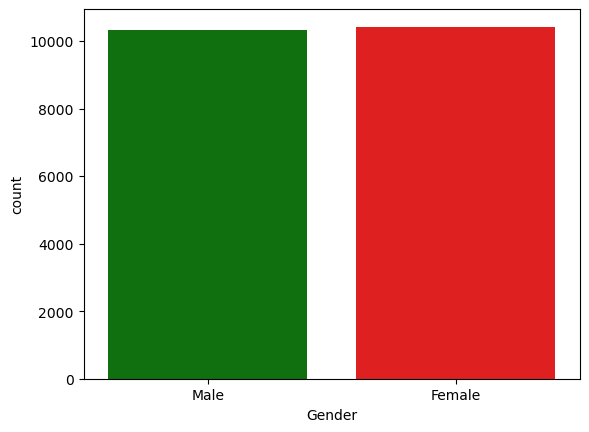

In [112]:
countplot(x='Gender', hue='Gender', data=train_df, palette=['green','red'], legend=False)
xlabel('Gender')
show()

--------------------------

In [113]:
train_df['Family history with overweight'].value_counts()

Family history with overweight
yes    17014
no      3744
Name: count, dtype: int64

---------------------

In [114]:
train_df['Frequent consumption of high-caloric food'].value_counts()

Frequent consumption of high-caloric food
yes    18982
no      1776
Name: count, dtype: int64

-----------------------

In [115]:
train_df['Consumption of food between meals'].value_counts()

Consumption of food between meals
Sometimes     17529
Frequently     2472
Always          478
no              279
Name: count, dtype: int64

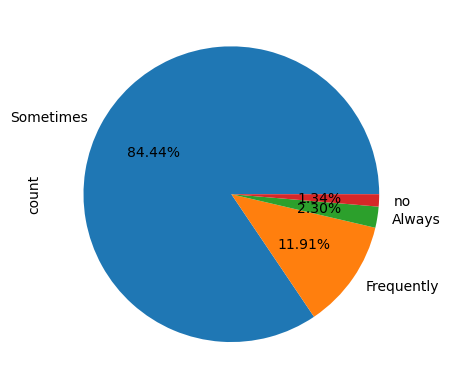

In [116]:
train_df['Consumption of food between meals'].value_counts().plot.pie(autopct='%0.2f%%')
show()

##### **The percentage of Consumption of food between meals (sometimes) is very high (84.44 %) compared to the rest of the other percentages** 

--------------------------

In [117]:
train_df['SMOKE'].value_counts()

SMOKE
no     20513
yes      245
Name: count, dtype: int64

---------------------

In [118]:
train_df['Whether the person takes calorie supplements'].value_counts()

Whether the person takes calorie supplements
no     20071
yes      687
Name: count, dtype: int64

---------------------------

In [119]:
train_df['Alcohol consumption'].value_counts()

Alcohol consumption
Sometimes     15066
no             5163
Frequently      529
Name: count, dtype: int64

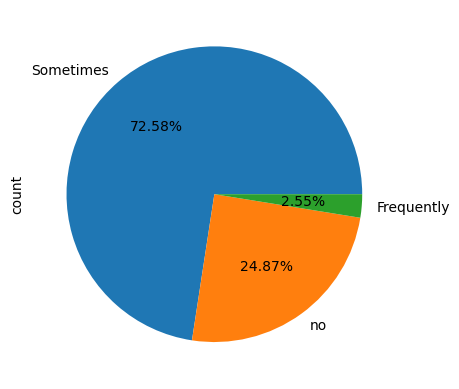

In [120]:
train_df['Alcohol consumption'].value_counts().plot.pie(autopct='%0.2f%%')
show()

##### **The percentage of Alcohol consumption (sometimes) is very high (72.58 %) compared to percentages of the rest of the other percentages** 

-----------------------------

In [121]:
train_df['Means of transportation used'].value_counts()

Means of transportation used
Public_Transportation    16687
Automobile                3534
Walking                    467
Motorbike                   38
Bike                        32
Name: count, dtype: int64

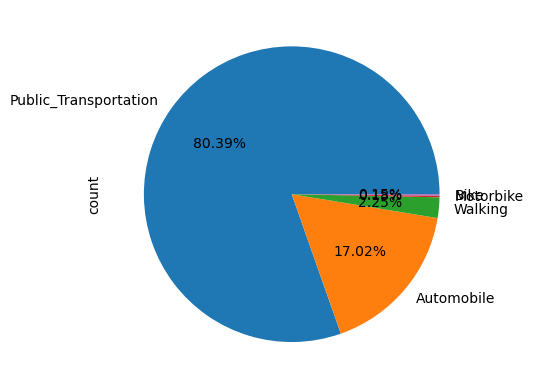

In [122]:
train_df['Means of transportation used'].value_counts().plot.pie(autopct='%0.2f%%')
show()

##### **The percentage of using public transport is very hight (80.39 %) compared to percentages of the rest of the other percentages** 

-------------------------

In [123]:
train_df['Obesity level class'].value_counts()

Obesity level class
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

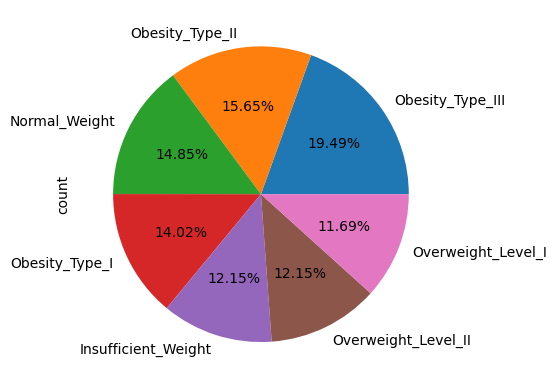

In [124]:
train_df['Obesity level class'].value_counts().plot.pie(autopct='%0.2f%%')
show()

## Model Preparation and Preprocessing
We will:
- Define features and target
- Split data into train/test
- Build a preprocessing `ColumnTransformer` to scale numeric features and one-hot encode categorical features


In [125]:
# Define features and target
y = train_df['Obesity level class']
X = train_df.drop(columns=['Obesity level class'])

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['float64','int64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Split data (stratified by target)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Ensure required transformers exist in this cell to avoid NameError
try:
    capper
    rare_grouper
except NameError:
    import pandas as pd
    from sklearn.preprocessing import FunctionTransformer

    def cap_outliers_iqr(X):
        if not hasattr(X, 'columns'):
            X = pd.DataFrame(X)
        df = X.copy()
        for col in df.columns:
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            lower = q1 - 1.5 * iqr
            upper = q3 + 1.5 * iqr
            df[col] = df[col].clip(lower, upper)
        return df

    def group_rare_categories(X, min_freq_ratio=0.01):
        if not hasattr(X, 'columns'):
            X = pd.DataFrame(X)
        df = X.copy()
        n = len(df)
        for col in df.columns:
            vc = df[col].value_counts(dropna=False)
            rare_levels = vc[vc < n * min_freq_ratio].index
            df[col] = df[col].where(~df[col].isin(rare_levels), other='Other')
        return df

    capper = FunctionTransformer(cap_outliers_iqr, feature_names_out='one-to-one', validate=False)
    rare_grouper = FunctionTransformer(group_rare_categories, kw_args={'min_freq_ratio': 0.01}, feature_names_out='one-to-one', validate=False)

# Build preprocessing transformer
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('cap', capper),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('rare', rare_grouper),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocess = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

len(numeric_features), len(categorical_features)


(8, 8)

## Cross-validated baseline models
We will evaluate several classifiers wrapped in a preprocessing pipeline using stratified 5-fold cross-validation. Metrics: accuracy and macro F1.


In [126]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

models = {
    'LogReg': LogisticRegression(max_iter=200),
    'SVC-rbf': SVC(kernel='rbf', probability=True),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1),
    'GaussianNB': GaussianNB()
}

results = []
for name, clf in models.items():
    pipe = Pipeline(steps=[('prep', preprocess), ('model', clf)])
    acc = cross_val_score(pipe, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
    f1m = cross_val_score(pipe, X_train, y_train, cv=cv, scoring='f1_macro', n_jobs=-1)
    results.append((name, acc.mean(), f1m.mean()))

# Sort by macro F1
top = sorted(results, key=lambda t: t[2], reverse=True)
for name, acc_mean, f1m_mean in top:
    print(f"{name:12s}  acc={acc_mean:.4f}  f1_macro={f1m_mean:.4f}")


RandomForest  acc=0.8849  f1_macro=0.8721
SVC-rbf       acc=0.8730  f1_macro=0.8593
LogReg        acc=0.8611  f1_macro=0.8456
DecisionTree  acc=0.8428  f1_macro=0.8269
GaussianNB    acc=0.5862  f1_macro=0.5223


## Hyperparameter tuning for top models
We will tune the two strongest baseline models using `GridSearchCV` with macro F1 as the primary scorer.


In [127]:
scorer = 'f1_macro'

search_spaces = {
    'LogReg': {
        'model__C': [0.1, 1.0, 5.0],
        'model__penalty': ['l2'],
        'model__solver': ['lbfgs']
    },
    'RandomForest': {
        'model__n_estimators': [200, 400],
        'model__max_depth': [None, 10, 20],
        'model__min_samples_split': [2, 5],
        'model__min_samples_leaf': [1, 2]
    },
    'SVC-rbf': {
        'model__C': [0.5, 1, 2],
        'model__gamma': ['scale', 0.01, 0.001]
    }
}

candidates = ['LogReg', 'RandomForest', 'SVC-rbf']

grid_results = {}
for name in candidates:
    pipe = Pipeline(steps=[('prep', preprocess), ('model', models[name])])
    grid = GridSearchCV(pipe, param_grid=search_spaces[name], cv=cv, scoring=scorer, n_jobs=-1, refit=True)
    grid.fit(X_train, y_train)
    grid_results[name] = grid
    print(f"{name}: best_f1_macro={grid.best_score_:.4f}")


c:\Users\Huawei\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogReg: best_f1_macro=0.8507
RandomForest: best_f1_macro=0.8761
SVC-rbf: best_f1_macro=0.8622


## Final evaluation on test set
Select the best tuned model based on validation F1, evaluate on the held-out test set, and display metrics.


In [128]:
# Pick best by validation score
best_name, best_grid = max(grid_results.items(), key=lambda kv: kv[1].best_score_)
best_pipe = best_grid.best_estimator_
print(f"Best model: {best_name}")

# Fit on full training set (already refit=True)
y_pred = best_pipe.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Macro F1:", f1_score(y_test, y_pred, average='macro'))

cm = confusion_matrix(y_test, y_pred, labels=sorted(y.unique()))
print("Confusion Matrix (labels ordered):", sorted(y.unique()))
print(cm)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Best model: RandomForest
Accuracy: 0.896917148362235
Macro F1: 0.8856848174002884
Confusion Matrix (labels ordered): ['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II']
[[470  33   0   0   0   2   0]
 [ 36 536   1   0   0  33  11]
 [  1   1 517  17   3  10  33]
 [  0   0  19 630   0   0   1]
 [  0   0   1   1 806   1   0]
 [  1  56  15   0   0 349  64]
 [  0  15  32   3   0  38 416]]

Classification Report:

                     precision    recall  f1-score   support

Insufficient_Weight       0.93      0.93      0.93       505
      Normal_Weight       0.84      0.87      0.85       617
     Obesity_Type_I       0.88      0.89      0.89       582
    Obesity_Type_II       0.97      0.97      0.97       650
   Obesity_Type_III       1.00      1.00      1.00       809
 Overweight_Level_I       0.81      0.72      0.76       485
Overweight_Level_II       0.79      0.83      0.81       504

       

## Save the best pipeline
We will persist the fully-fitted preprocessing + estimator pipeline to disk for later inference.


In [129]:
import pickle

with open('best_obesity_pipeline.pkl', 'wb') as f:
    pickle.dump(best_pipe, f)

'best_obesity_pipeline.pkl saved'


'best_obesity_pipeline.pkl saved'

In [130]:
# Custom transformers via FunctionTransformer

import pandas as pd

def cap_outliers_iqr(X):
    # Accept numpy array or DataFrame
    if not hasattr(X, 'columns'):
        X = pd.DataFrame(X)
    df = X.copy()
    for col in df.columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        df[col] = df[col].clip(lower, upper)
    return df

def group_rare_categories(X, min_freq_ratio=0.01):
    # Accept numpy array or DataFrame
    if not hasattr(X, 'columns'):
        X = pd.DataFrame(X)
    df = X.copy()
    n = len(df)
    for col in df.columns:
        vc = df[col].value_counts(dropna=False)
        rare_levels = vc[vc < n * min_freq_ratio].index
        df[col] = df[col].where(~df[col].isin(rare_levels), other='Other')
    return df

capper = FunctionTransformer(cap_outliers_iqr, feature_names_out='one-to-one', validate=False)
rare_grouper = FunctionTransformer(group_rare_categories, kw_args={'min_freq_ratio':0.01}, feature_names_out='one-to-one', validate=False)


## Feature Engineering: BMI and BMI buckets


In [131]:
def add_bmi(df):
    df = df.copy()
    # Height is in meters? If centimeters, convert accordingly. Assuming meters.
    df['BMI'] = df['Weight'] / (df['Height'] ** 2)
    return df

def add_bmi_bucket(df):
    df = df.copy()
    bins = [0, 18.5, 25, 30, np.inf]
    labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
    df['BMI_bucket'] = np.clip(pd.cut(df['BMI'], bins=bins, labels=labels, right=False).astype(str), a_min=None, a_max=None)
    return df

# Apply BMI to original frame before split if not present
import pandas as pd
if 'BMI' not in train_df.columns:
    train_df = add_bmi(train_df)
    # Only bucket for feature engineering; model will handle via preprocessing
    train_df = add_bmi_bucket(train_df)

# Rebuild X, y and splits to include new features
y = train_df['Obesity level class']
X = train_df.drop(columns=['Obesity level class'])

numeric_features = X.select_dtypes(include=['float64','int64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Update preprocess to include new columns (already generic by dtypes)
preprocess = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                ('cap', capper),
                                ('scaler', StandardScaler())]), numeric_features),
        ('cat', Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                                ('rare', rare_grouper),
                                ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))]), categorical_features)
    ]
)

len(numeric_features), len(categorical_features)


TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

## Expanded leaderboard with multiple metrics and fit times


In [ ]:
scoring = {
    'accuracy': 'accuracy',
    'f1_macro': 'f1_macro',
    'balanced_acc': 'balanced_accuracy',
    'kappa': make_scorer(cohen_kappa_score)
}

from sklearn.metrics import make_scorer

rows = []
for name, clf in models.items():
    pipe = Pipeline(steps=[('prep', preprocess), ('model', clf)])
    cvres = cross_validate(pipe, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1, return_train_score=False)
    rows.append({
        'model': name,
        'acc_mean': np.mean(cvres['test_accuracy']),
        'f1_macro_mean': np.mean(cvres['test_f1_macro']),
        'balanced_acc_mean': np.mean(cvres['test_balanced_acc']),
        'kappa_mean': np.mean(cvres['test_kappa']),
        'fit_time_mean_s': np.mean(cvres['fit_time'])
    })

leaderboard = pd.DataFrame(rows).sort_values('f1_macro_mean', ascending=False)
leaderboard


## Calibrated probabilities (Platt scaling) on best baseline


In [ ]:
# Choose baseline best by CV leaderboard
best_base_name = leaderboard.iloc[0]['model']
base_clf = models[best_base_name]

calibrated = Pipeline([
    ('prep', preprocess),
    ('model', CalibratedClassifierCV(base_estimator=base_clf, method='sigmoid', cv=3))
])

calibrated.fit(X_train, y_train)
proba = calibrated.predict_proba(X_test)
y_pred_cal = calibrated.predict(X_test)

print('Acc (cal):', accuracy_score(y_test, y_pred_cal))
print('F1 macro (cal):', f1_score(y_test, y_pred_cal, average='macro'))


## Permutation importance on the best tuned pipeline


In [ ]:
# Use best_pipe from earlier tuning
# Build feature names after preprocessing to map importances
onehot = best_pipe.named_steps['prep'].named_transformers_['cat'].named_steps['onehot']
cat_feature_names = onehot.get_feature_names_out(categorical_features)
feature_names = list(numeric_features) + list(cat_feature_names)

r = permutation_importance(best_pipe, X_test, y_test, scoring='f1_macro', n_repeats=5, random_state=42)
imp = pd.DataFrame({'feature': feature_names, 'importance_mean': r.importances_mean})
imp.sort_values('importance_mean', ascending=False).head(20)


## Predict single helper with input validation


In [ ]:
# Simple schema validation without external dependencies
required_cols = X.columns.tolist()

def validate_and_prepare(input_dict):
    # Check required keys
    missing = [c for c in required_cols if c not in input_dict]
    if missing:
        raise ValueError(f"Missing required keys: {missing}")
    row = pd.DataFrame([{c: input_dict.get(c) for c in required_cols}])
    # Compute BMI if empty
    if 'BMI' in row.columns and (pd.isna(row['BMI']).iloc[0] or row['BMI'].iloc[0] is None):
        row['BMI'] = row['Weight'] / (row['Height'] ** 2)
    # Compute BMI_bucket if empty
    if 'BMI_bucket' in row.columns and (pd.isna(row['BMI_bucket']).iloc[0] or row['BMI_bucket'].iloc[0] is None):
        bins = [0, 18.5, 25, 30, np.inf]
        labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
        row['BMI_bucket'] = pd.cut(row['BMI'], bins=bins, labels=labels, right=False).astype(str)
    return row


def predict_single(input_dict):
    row = validate_and_prepare(input_dict)
    pred = best_pipe.predict(row)[0]
    proba = best_pipe.predict_proba(row)[0] if hasattr(best_pipe, 'predict_proba') else None
    return pred, proba


## Save model metadata (reproducibility)


In [ ]:
metadata = {
    'best_model_name': best_name,
    'best_cv_f1_macro': float(best_grid.best_score_),
    'classes': list(best_pipe.named_steps['model'].classes_) if hasattr(best_pipe.named_steps['model'], 'classes_') else None,
    'timestamp': pd.Timestamp.utcnow().isoformat(),
    'numeric_features': numeric_features,
    'categorical_features': categorical_features,
}

with open('best_obesity_pipeline_metadata.json', 'w') as f:
    json.dump(metadata, f, indent=2)

'best_obesity_pipeline_metadata.json saved'


--------------------------------
------------------------------

## **Distribution of Variables**

------------------------

- **Numerical Features (KDE)**

----------------------

In [ ]:
train_df.select_dtypes('number')

,Age,Height,Weight,Frequency of vegetable consumption,Number of main meals the person eats per day,Daily water consumption,Physical activity frequency,Time spent using technology
0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473
1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000
2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584
3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199
4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721
...,...,...,...,...,...,...,...,...
20753,25.137087,1.766626,114.187096,2.919584,3.000000,2.151809,1.330519,0.196680
20754,18.000000,1.710000,50.000000,3.000000,4.000000,1.000000,2.000000,1.000000
20755,20.101026,1.819557,105.580491,2.407817,3.000000,2.000000,1.158040,1.198439
20756,33.852953,1.700000,83.520113,2.671238,1.971472,2.144838,0.000000,0.973834


In [ ]:
# for	col	in train_df.select_dtypes('number').columns:
#     figure(figsize=(12,	4))
#     kdeplot(train_df[col], fill=True,	color='blue', alpha=0.6)
#     title(f'Kernel Density Estimate(KDE) - {col}',	fontsize=16)
#     xlabel(col,	fontsize=12)
#     ylabel('Density', fontsize=12)
#     grid(True, linestyle='--', alpha=0.7)
#     tight_layout()
#     show()

-----------------

#### **The Distribution of Age**

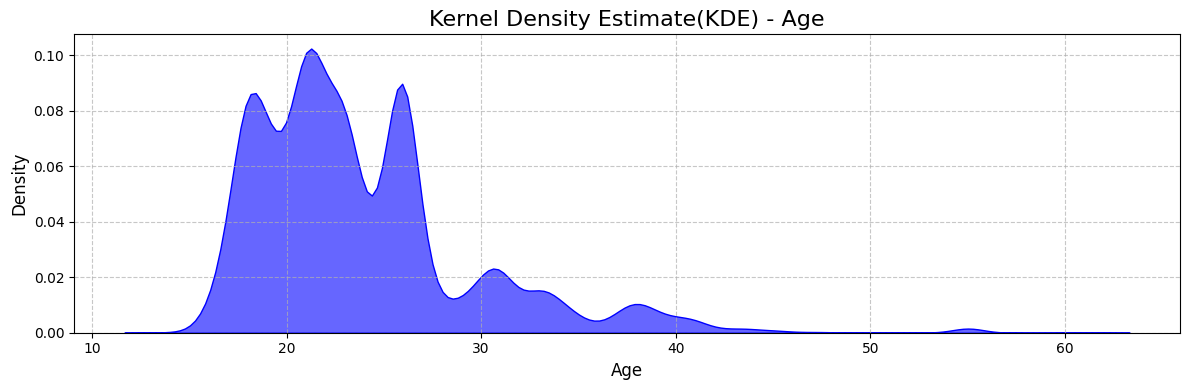

In [ ]:
figure(figsize=(12,	4))
kdeplot(train_df['Age'], fill=True,	color='blue', alpha=0.6)
title(f'Kernel Density Estimate(KDE) - Age',	fontsize=16)
xlabel('Age',	fontsize=12)
ylabel('Density', fontsize=12)
grid(True, linestyle='--', alpha=0.7)
tight_layout()
show()

- ##### **Multimodal Distribution**: There appear to be several distinct peaks in the distribution, indicating the presence of multiple age groups with higher density in the data.
- ##### **Main Peak**: The largest peak is around the age of 20-25 years, suggesting that this age group is the most represented in the dataset.
- ##### **Secondary Peaks**: There are other less prominent peaks around the age of 30 and below 10 years, indicating the presence of other subgroups with notable density.
- ##### **Data Dispersion**: The distribution spans a wide range from approximately 5 years to 60 years, demonstrating significant variability in the ages of individuals in the data.
- ##### **Tail Decline**: The right tail of the distribution gradually declines, suggesting a smaller number of individuals in the older age groups.

------------------------

#### **The Distribution of Height**

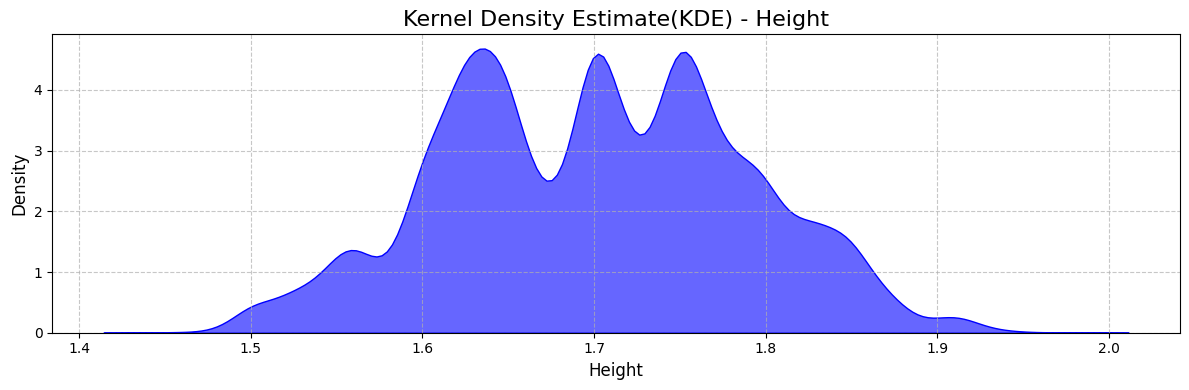

In [ ]:
figure(figsize=(12,	4))
kdeplot(train_df['Height'], fill=True,	color='blue', alpha=0.6)
title(f'Kernel Density Estimate(KDE) - Height',	fontsize=16)
xlabel('Height',	fontsize=12)
ylabel('Density', fontsize=12)
grid(True, linestyle='--', alpha=0.7)
tight_layout()
show()

- ##### **Multimodal Distribution**: Plot also shows multiple peaks, suggesting the presence of several groups with different height ranges that are more frequent in dataset.
- ##### **Dominant Height Ranges**: The most prominent peaks appear to be around heights of approximately 1.65 meters and 1.75 meters. This indicates that individuals with these heights are most common in data.
- ##### **Secondary Peak**: There's a smaller but noticeable peak around 1.55 meters, suggesting another, less frequent, group of individuals with this height.
- ##### **Height Range**: The distribution of height spans from roughly 1.4 meters to 2.0 meters, indicating the range of heights present in dataset.
- ##### **Lower Density at Extremes**: The density is considerably lower at the extreme ends of the height spectrum (very short or very tall individuals) compared to the central peaks

-------------------------

#### **The Distribution of Weight**

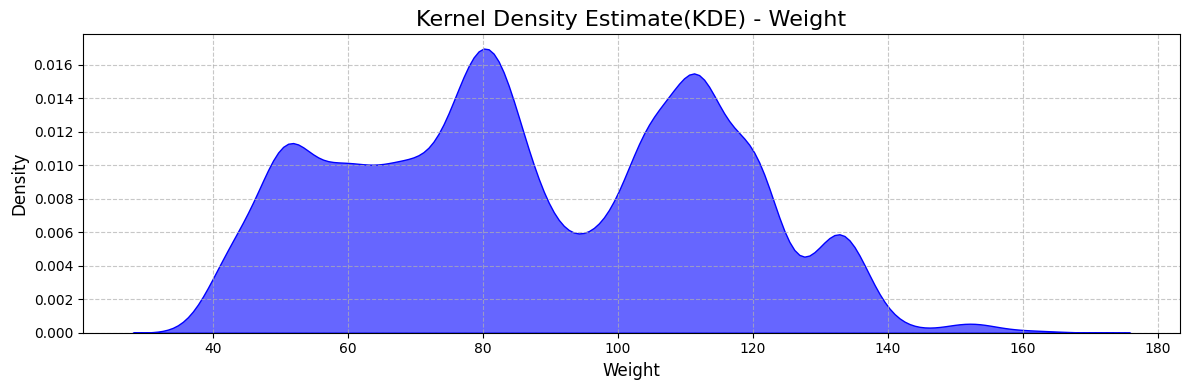

In [ ]:
figure(figsize=(12,	4))
kdeplot(train_df['Weight'], fill=True,	color='blue', alpha=0.6)
title(f'Kernel Density Estimate(KDE) - Weight',	fontsize=16)
xlabel('Weight',	fontsize=12)
ylabel('Density', fontsize=12)
grid(True, linestyle='--', alpha=0.7)
tight_layout()
show()

- ##### **Bimodal Distribution**: This plot clearly shows two distinct peaks, indicating two weight ranges that are particularly common in dataset. This suggests the presence of two major groups of individuals with different typical weights.
- ##### **Primary Weight Group**: The higher peak appears around a weight of approximately 80 kilograms. This suggests that a significant portion of your dataset consists of individuals weighing around this value.
- ##### **Secondary Weight Group**: The second, slightly lower peak is located around 115 kilograms. This indicates another substantial group of individuals with a higher average weight compared to the first group.
- ##### **Weight Range**: The distribution of weight spans from roughly 30 kilograms to 180 kilograms, showing the overall range of weights present in data.
- ##### **Lower Density in Between and at Extremes**: The density is notably lower between the two main peaks (around 90-100 kg) and also at the very low and very high ends of the weight spectrum. This implies fewer individuals in these weight ranges within dataset.
- ##### **Smaller Peaks**: There are also smaller bumps or minor peaks visible, for instance, around 55 kg and 140 kg, which might represent smaller subgroups within data.

-------------------

#### **The Distribution of daily water consumption**

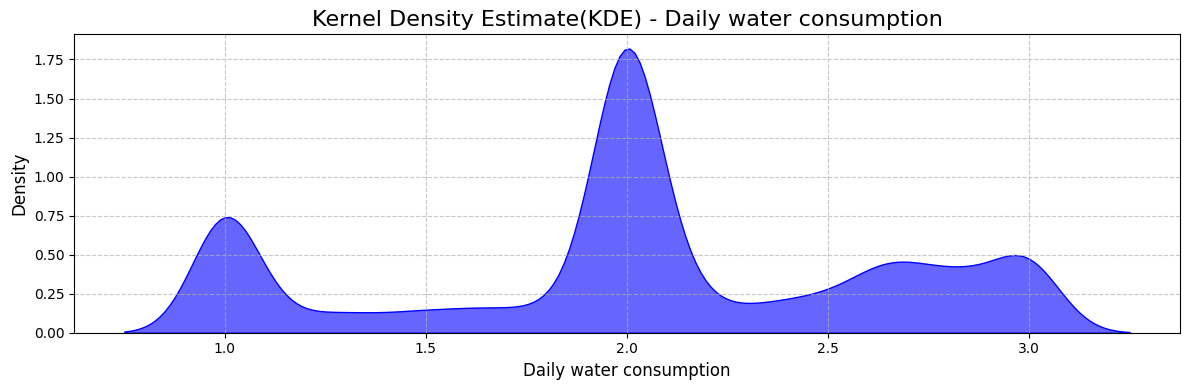

In [ ]:
figure(figsize=(12,	4))
kdeplot(train_df['Daily water consumption'], fill=True,	color='blue', alpha=0.6)
title(f'Kernel Density Estimate(KDE) - Daily water consumption',	fontsize=16)
xlabel('Daily water consumption',	fontsize=12)
ylabel('Density', fontsize=12)
grid(True, linestyle='--', alpha=0.7)
tight_layout()
show()

- ##### **Trimodal Distribution**: We can clearly observe three distinct peaks, suggesting three common levels of daily water consumption within dataset. This indicates the presence of at least three groups of individuals with different typical water intake habits.
- ##### **Primary Consumption Level**: The most prominent peak occurs around 2 liters of daily water consumption. This indicates that a significant portion of individuals in dataset tends to consume around this amount of water per day.
- ##### **Secondary Consumption Levels**: There are two other notable peaks. One, smaller than the primary peak, is located around 1 liter, suggesting another group with lower daily water intake. The third peak, also substantial, appears around 3 liters, indicating a group with higher daily water consumption.
- ##### **Range of Consumption**: The distribution spans from approximately 0.5 liters to 3.5 liters of daily water consumption, showing the overall range observed in data.
- ##### **Lower Density in Between**: The density is lower in the regions between these peaks, suggesting fewer individuals with daily water consumption levels between 1 and 2 liters, and between 2 and 3 liters.

-----------------

#### **The Distribution of physical activity frequency**

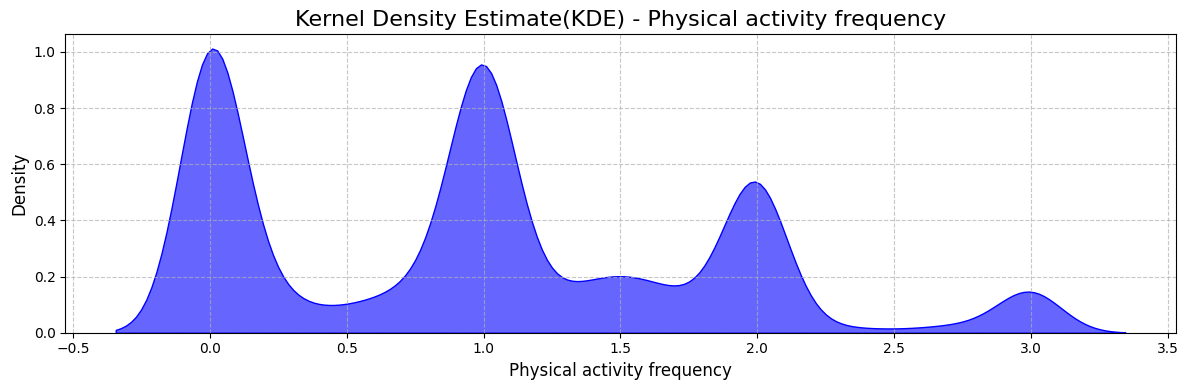

In [ ]:
figure(figsize=(12,	4))
kdeplot(train_df['Physical activity frequency'], fill=True,	color='blue', alpha=0.6)
title(f'Kernel Density Estimate(KDE) - Physical activity frequency',	fontsize=16)
xlabel('Physical activity frequency',	fontsize=12)
ylabel('Density', fontsize=12)
grid(True, linestyle='--', alpha=0.7)
tight_layout()
show()

- ##### **Multimodal Distribution**: We can see four distinct peaks, indicating four common frequencies of physical activity within your dataset. This suggests the presence of several groups of individuals with different levels of engagement in physical activity.
- ##### **Primary Peaks**: The two most prominent peaks appear around a frequency of 0 (likely representing individuals who do not engage in physical activity) and around a frequency of 1 (perhaps indicating those who are active once per some defined period, like per week). These seem to be the most common levels of physical activity in your data.
- ##### **Secondary Peaks**: There are two smaller but noticeable peaks. One is around a frequency of 2, suggesting another group engaging in physical activity with this frequency. The smallest peak is around a frequency of 3, indicating a smaller group with a higher frequency of physical activity.
- ##### **Range of Frequency**: The distribution spans from approximately -0.2 to 3.2 on the physical activity frequency scale. Since frequency cannot be negative, the part below zero is likely due to the kernel density estimation process smoothing the data. The practical range is from 0 to around 3.
- ##### **Lower Density in Between**: The density is lower between the main peaks, suggesting fewer individuals with physical activity frequencies between 0 and 1, and between 1 and 2, etc.

------------------------

### **Correlation**

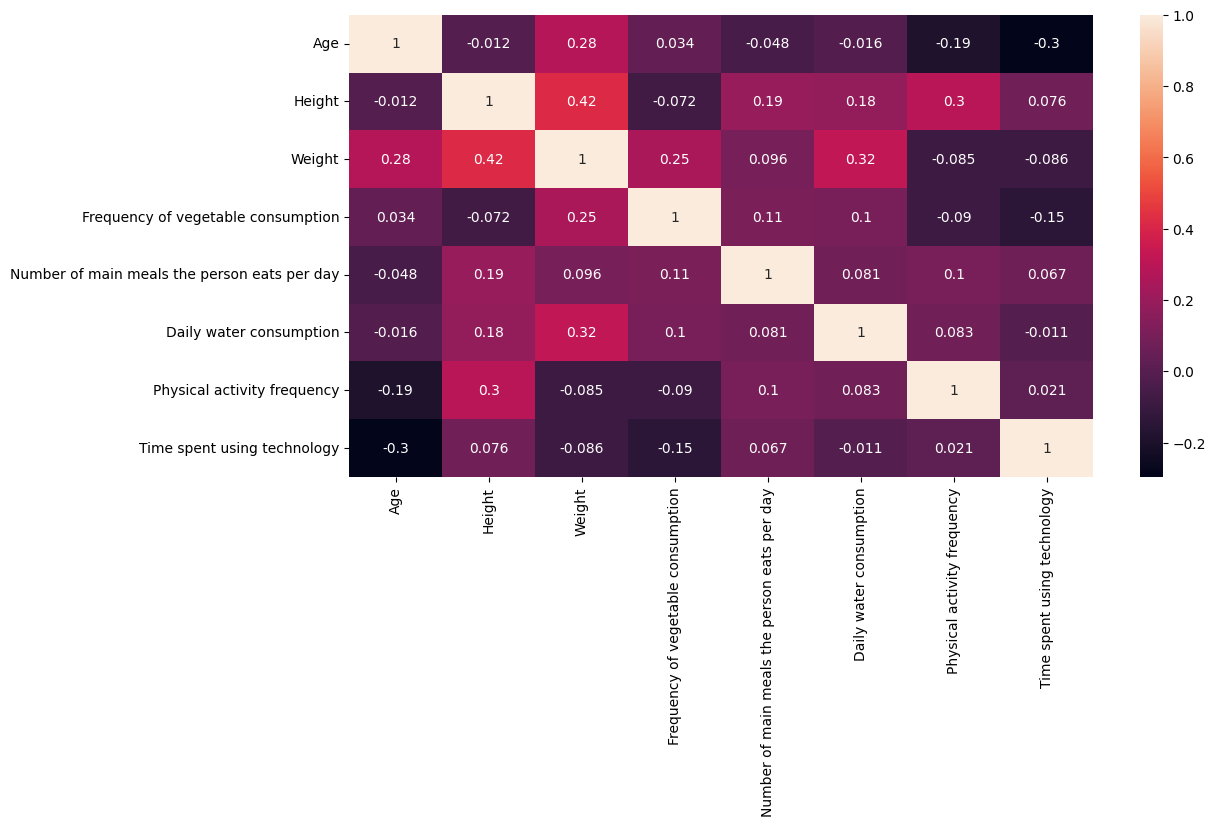

In [ ]:
figure(figsize=(12,	6))
heatmap(train_df.select_dtypes(include='number').corr(), annot=True)
show()

- ##### **Weight and Height (0.42)**: There is a moderate positive correlation, meaning that generally, taller people tend to weigh more.
- ##### **Weight and Age (0.28)**: There is a weak positive correlation, suggesting a slight tendency for weight to increase with age in dataset.
- ##### **Weight and Daily water consumption (0.32)**: There is a weak positive correlation, suggesting a slight tendency for individuals who consume more water to also weigh more in dataset.
- ##### **Height and Physical activity frequency (0.3)**: There is a weak positive correlation, suggesting a slight tendency for taller individuals to engage in physical activity more frequently.
- ##### **Age and Time spent using technology (-0.3)**: There is a weak negative correlation, suggesting a slight tendency for older individuals to spend less time using technology.
- ##### **Physical activity frequency and Time spent using technology (0.021)**: The correlation is very weak and almost zero, indicating almost no linear relationship between how frequently someone engages in physical activity and the time they spend using technology in dataset.

##### There is a high negative correlation (-0.3) between **Age** and **Time spent using technology**

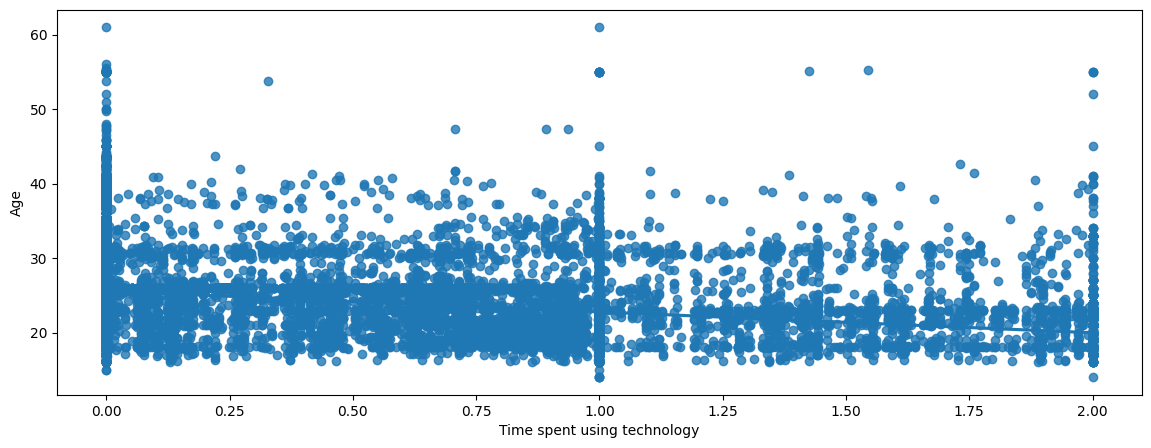

In [ ]:
fig,ax = subplots()
fig.set_size_inches(14, 5)
regplot(x="Time spent using technology", y="Age", data=train_df,ax=ax)
show()

------------------------------
-----------------------------

## **Feature Extraction**

-------------------------

In [ ]:
train_df['Frequency of vegetable consumption'].value_counts()

Frequency of vegetable consumption
3.000000    7658
2.000000    7653
1.000000     275
2.967300     121
2.766612      54
            ... 
2.443674       1
1.111887       1
1.595746       1
2.577427       1
2.731368       1
Name: count, Length: 934, dtype: int64

##### Transform values in column **Frequency of vegetable consumption** with **round()** function

In [ ]:
train_df['Frequency of vegetable consumption'] = train_df['Frequency of vegetable consumption'].apply(lambda x : round(x))

In [ ]:
train_df['Frequency of vegetable consumption'].value_counts()

Frequency of vegetable consumption
3    10092
2     9911
1      755
Name: count, dtype: int64

#### Extracting new column **[Frequency of vegetable consumption Classes]** from **[Frequency of vegetable consumption]**

In [ ]:
def fcvc(m):
    m = int(m)
    if m == 1:
        return 'Rarely consumes vegetables'
    if m == 2:
        return 'Sometimes consumes vegetables'
    if m == 3:
        return 'Regularly consumes vegetables'

train_df['Frequency of vegetable consumption Classes'] = train_df['Frequency of vegetable consumption'].apply(lambda x : fcvc(x))

In [ ]:
train_df['Frequency of vegetable consumption Classes'].value_counts()

Frequency of vegetable consumption Classes
Regularly consumes vegetables    10092
Sometimes consumes vegetables     9911
Rarely consumes vegetables         755
Name: count, dtype: int64

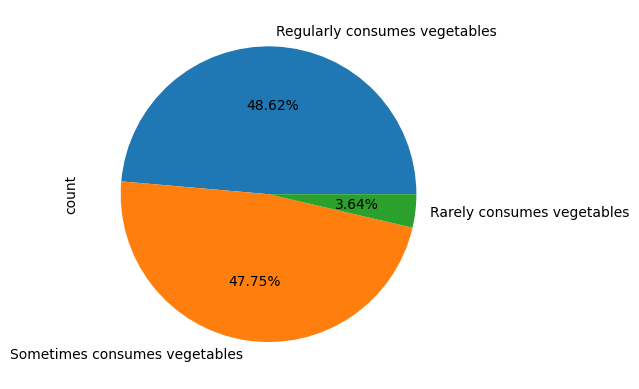

In [ ]:
train_df['Frequency of vegetable consumption Classes'].value_counts().plot.pie(autopct='%0.2f%%')
show()

##### **The percentage of rarely consumes vegetables is very low (3.64 %) compared to the rest of the other percentages**

-------------------------------

In [ ]:
train_df['Number of main meals the person eats per day'].value_counts()

Number of main meals the person eats per day
3.000000    14706
1.000000     1976
4.000000      715
2.993623       39
2.695396       25
            ...  
3.608850        1
1.193486        1
2.737620        1
3.019574        1
2.256119        1
Name: count, Length: 689, dtype: int64

##### Transform values in column **Number of main meals the person eats per day** with **round()** function

In [ ]:
train_df['Number of main meals the person eats per day'] = train_df['Number of main meals the person eats per day'].apply(lambda x : round(x))

In [ ]:
train_df['Number of main meals the person eats per day'] = train_df['Number of main meals the person eats per day'].astype(int)

In [ ]:
train_df['Number of main meals the person eats per day'].unique()

array([3, 1, 2, 4])

In [ ]:
train_df['Number of main meals the person eats per day'].value_counts()

Number of main meals the person eats per day
3    16309
1     2510
4     1040
2      899
Name: count, dtype: int64

#### Extracting new column **[Number of main meals the person eats per day Classes]** from **[Number of main meals the person eats per day]**

In [ ]:
def fncp(m):
    m = int(m)
    if m == 1:
        return 'One meal per day'
    if m == 2:
        return 'Two meals per day'
    if m == 3:
        return 'Three meals per day'
    if m == 4:
        return 'More than three meals'

train_df['Number of main meals the person eats per day Classes'] = train_df['Number of main meals the person eats per day'].apply(lambda x : fncp(x))

In [ ]:
train_df['Number of main meals the person eats per day Classes'].value_counts()

Number of main meals the person eats per day Classes
Three meals per day      16309
One meal per day          2510
More than three meals     1040
Two meals per day          899
Name: count, dtype: int64

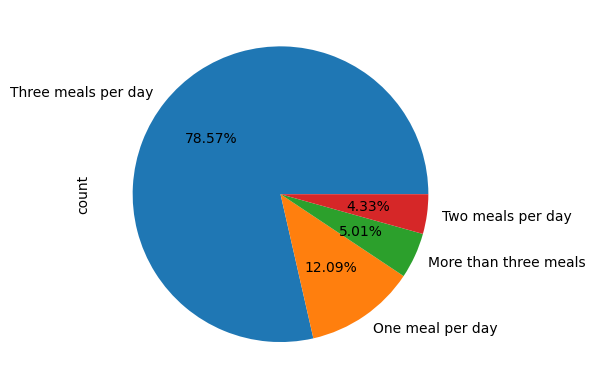

In [ ]:
train_df['Number of main meals the person eats per day Classes'].value_counts().plot.pie(autopct='%0.2f%%')
show()

##### **The percentage of eating three meals per day is very hight (78.57 %) compared to the rest of the other percentages**

------------------------

#### Extracting new column **[Daily water consumption Classes]** from **[Daily water consumption]**

In [ ]:
train_df['Daily water consumption'].value_counts()

Daily water consumption
2.000000    6616
1.000000    2799
3.000000    1571
2.825629      77
2.868167      60
            ... 
2.835195       1
2.632983       1
2.090213       1
2.756916       1
1.365188       1
Name: count, Length: 1506, dtype: int64

In [ ]:
def fncp(m):
    m = int(m)
    if m <= 1:
        return 'Low water intake'
    elif m <= 2:
        return 'Moderate water intake'
    if m > 2:
        return 'High water intake'

train_df['Daily water consumption Classes'] = train_df['Daily water consumption'].apply(lambda x : fncp(x))

In [ ]:
train_df['Daily water consumption Classes'].value_counts()

Daily water consumption Classes
Moderate water intake    13051
Low water intake          6136
High water intake         1571
Name: count, dtype: int64

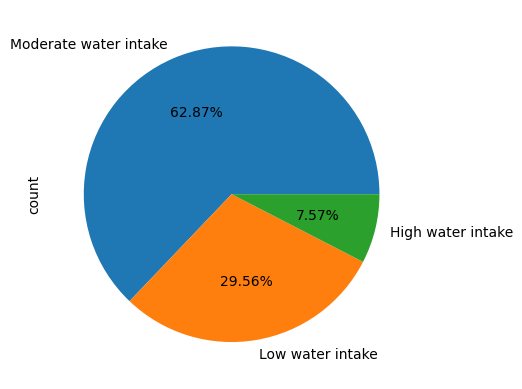

In [ ]:
train_df['Daily water consumption Classes'].value_counts().plot.pie(autopct='%0.2f%%')
show()

##### **The percentage of moderate water intake is very hight (62.87 %) compared to the rest of the other percentages**

------------------------

#### Extracting new column **[Physical activity frequency Classes]** from **[Physical activity frequency]**

In [ ]:
train_df['Physical activity frequency'].value_counts()

Physical activity frequency
0.000000    5044
1.000000    4097
2.000000    2391
3.000000     800
1.097905      56
            ... 
1.706287       1
0.675983       1
1.923607       1
1.320209       1
0.988668       1
Name: count, Length: 1360, dtype: int64

In [ ]:
def fncp(m):
    m = int(m)
    if m == 0 :
        return 'No physical activity'
    elif m <= 1 :
        return 'Very low activity'
    elif m < 2.6 :
        return 'Low to moderate activity'
    else :
        return 'Moderate activity'

train_df['Physical activity frequency Classes'] = train_df['Physical activity frequency'].apply(lambda x : fncp(x))

In [ ]:
train_df['Physical activity frequency Classes'].value_counts()

Physical activity frequency Classes
No physical activity        9191
Very low activity           7886
Low to moderate activity    2881
Moderate activity            800
Name: count, dtype: int64

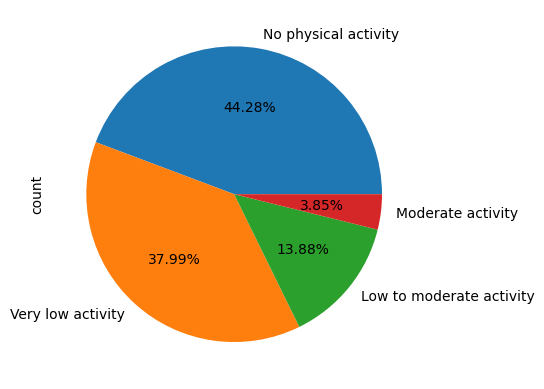

In [ ]:
train_df['Physical activity frequency Classes'].value_counts().plot.pie(autopct='%0.2f%%')
show()

##### **The percentage of moderate activity is very low (3.85 %) compared to the rest of the other percentages**

----------------------

#### Extracting new column **[Time spent using technology Classes]** from **[Time spent using technology]**

In [ ]:
train_df['Time spent using technology'].value_counts()

Time spent using technology
0.000000    6566
1.000000    4326
2.000000    1133
0.002600      78
0.723154      65
            ... 
1.223661       1
0.057868       1
0.236067       1
0.073088       1
0.768375       1
Name: count, Length: 1297, dtype: int64

In [ ]:
def fncp(m):
    m = int(m)
    if m <= 1 :
        return 'Very low screen time'
    else :
        return 'Moderate screen time'

train_df['Time spent using technology Classes'] = train_df['Time spent using technology'].apply(lambda x : fncp(x))

In [ ]:
train_df['Time spent using technology Classes'].value_counts()

Time spent using technology Classes
Very low screen time    19625
Moderate screen time     1133
Name: count, dtype: int64

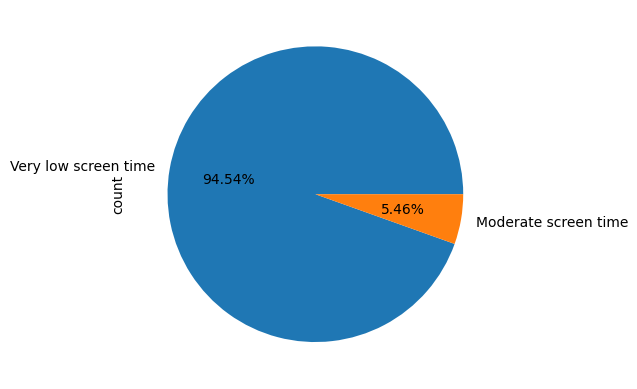

In [ ]:
train_df['Time spent using technology Classes'].value_counts().plot.pie(autopct='%0.2f%%')
show()

##### **The percentage of very low screen time is very hight (94.54 %) compared to the rest of the other percentages**

------------------------

##### Transform values in column **Age** with **round()** function

In [ ]:
train_df['Age']

0        24.443011
1        18.000000
2        18.000000
3        20.952737
4        31.641081
           ...    
20753    25.137087
20754    18.000000
20755    20.101026
20756    33.852953
20757    26.680376
Name: Age, Length: 20758, dtype: float64

In [ ]:
train_df['Age'] = train_df['Age'].apply(lambda x : int(round(x)))
train_df['Age'] 

0        24
1        18
2        18
3        21
4        32
         ..
20753    25
20754    18
20755    20
20756    34
20757    27
Name: Age, Length: 20758, dtype: int64

In [ ]:
# train_df.to_csv('Obesity risk (New data).csv',index=False)

-----------------------
-----------------------

## **Detect Outliers**

------------------------

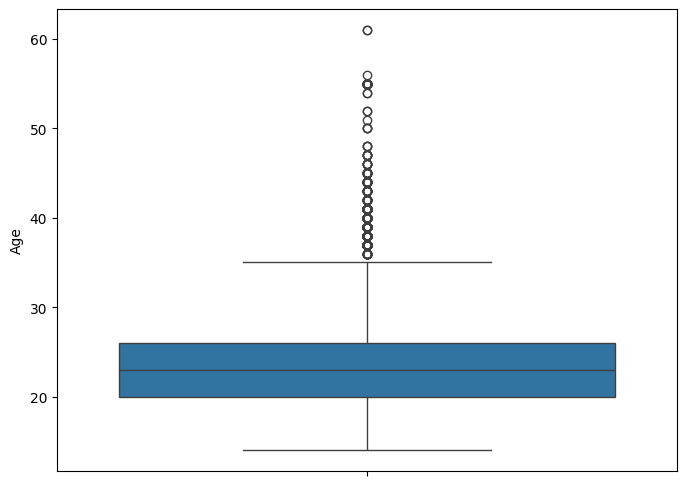

In [ ]:
fig, axes = subplots(nrows=1, ncols=1)
fig.set_size_inches(8, 6)
boxplot(data = train_df, y = 'Age', orient="v", ax=axes)
show()

- ##### The majority of individuals in dataset are between approximately 20 and 26 years old.
- ##### The median age is around 23 years old.
- ##### There are some younger individuals (down to around 14 years old) and a number of significantly older individuals (outliers) in the dataset.
- ##### The distribution of ages is somewhat skewed towards the lower end, as the median is closer to the first quartile than the third.

In [ ]:
Q1=train_df['Age'].quantile(0.25)
Q3=train_df['Age'].quantile(0.75)
IQR = Q3-Q1

Lower_bound = Q1 - 1.5*IQR
Upper_bound = Q3 + 1.5*IQR

outliers = ((train_df['Age']>Upper_bound)|(train_df['Age']<Lower_bound)).sum()
Total = train_df['Age'].shape[0]
print(f'Total of outliers in Age are : {outliers}--{round(100*(outliers)/Total,2)}%')
    
if outliers > 0:
    train_df=train_df.loc[(train_df['Age'] <= Upper_bound) & (train_df['Age'] >= Lower_bound)]

Total of outliers in Age are : 1029--4.96%


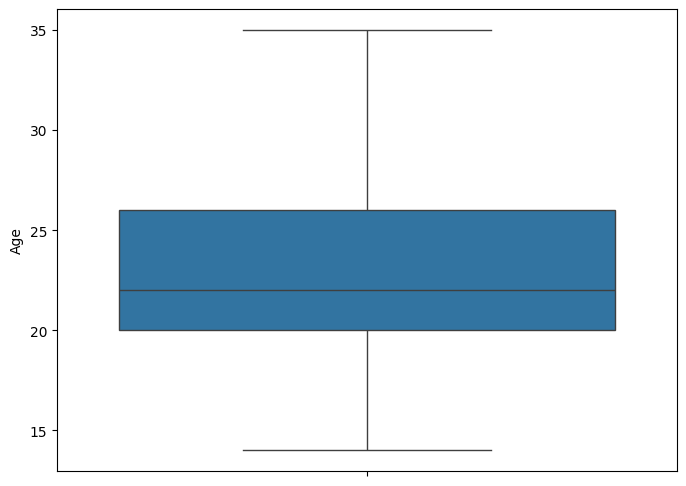

In [ ]:
fig, axes = subplots(nrows=1, ncols=1)
fig.set_size_inches(8, 6)
boxplot(data = train_df, y = 'Age', orient="v", ax=axes)
show()

- ##### After removing the outliers, this box plot now shows that the age distribution is more concentrated, with:

- ##### The middle 50% of the individuals falling between 20 and 26 years old.
- ##### The median age remaining around 23 years old.
- ##### The overall range of ages is now from approximately 14 to 35 years old.

In [ ]:
# train_df.to_csv('train data (New data).csv',index=False)

------------------------
------------------------

## **Analysis**

---------------------------

##### **Investigate relationships between Gender and Physical activity frequency Classes**

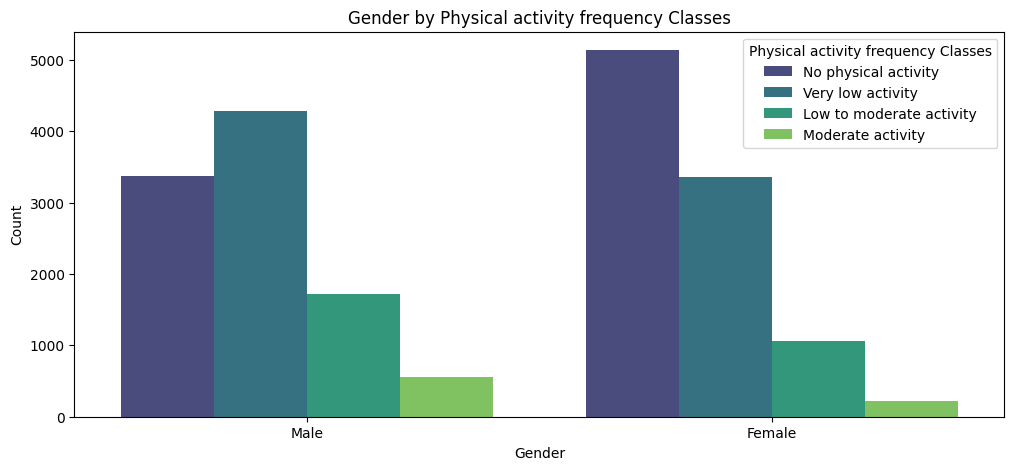

In [ ]:
figure(figsize=(12,	5))
countplot(data=train_df, x='Gender', hue='Physical activity frequency Classes',	palette='viridis')
title('Gender by Physical activity frequency Classes')
xlabel('Gender')
# plt.xticks(rotation=45)
ylabel('Count')
show()

- ##### No physical activity is the most prevalent category for both genders. However, the number of females reporting no physical activity is notably higher than the number of males in the same category.
- ##### Very low activity is the second most frequent category for both genders. Interestingly, more males fall into this category than females.
- ##### As the physical activity frequency increases, the number of individuals in each category decreases for both males and females.
- ##### There appears to be a gender disparity in physical activity levels. A higher proportion of females in this dataset report having no physical activity, while a higher proportion of males report engaging in very low to moderate activity.

### **Summary**:

- ##### Lack of physical activity is a significant characteristic for both males and females, but more so for females.
- ##### Males tend to have slightly higher engagement in very low to moderate physical activity compared to females.
- ##### Moderate physical activity is the least common across both genders.
##### This information could be crucial for understanding the lifestyle habits within study population and how they might relate to obesity risk.

------------------------

##### **Investigate relationships between Gender and Obesity level class**

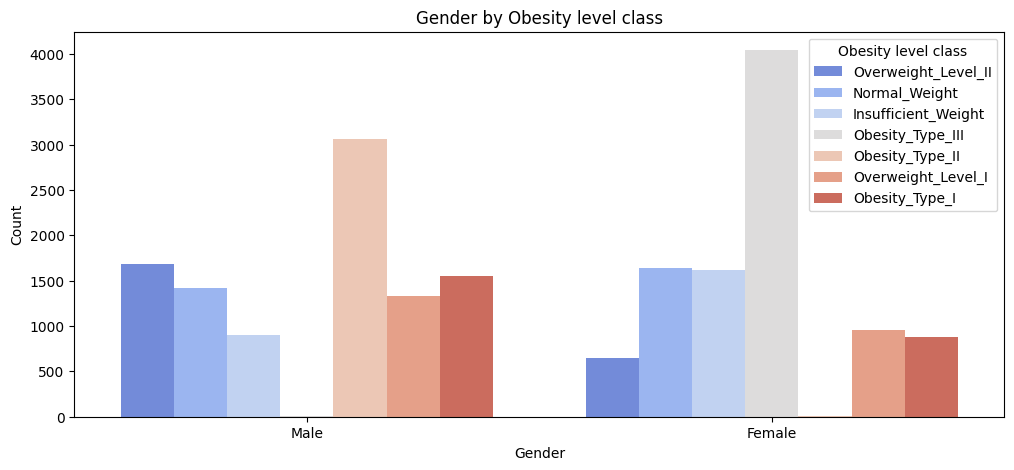

In [ ]:
figure(figsize=(12, 5))
countplot(data=train_df, x='Gender', hue='Obesity level class', palette='coolwarm')
title('Gender by Obesity level class')
xlabel('Gender')
ylabel('Count')
show()

- ##### **Normal Weight** and **Overweight_Level_II** are relatively common in both genders.
- ##### **Insufficient Weight** is more prevalent in females than males in this dataset.
- ##### **Obesity_Type_III** is significantly more common in females than males.
- ##### **Obesity_Type_II**, Overweight_Level_I, and Obesity_Type_I are more prevalent in males than females.

-------------------------

##### **Analyze weight distribution by Gender**

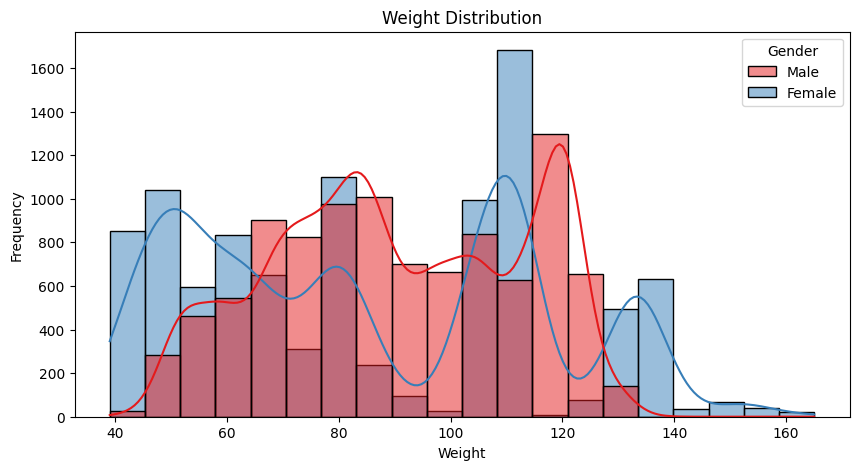

In [ ]:
figure(figsize=(10, 5))
histplot(data=train_df,	x='Weight',	hue='Gender', kde=True, bins=20, palette='Set1')
title('Weight Distribution')
xlabel('Weight')
ylabel('Frequency')
show()

### **Gender Comparison**:

- ##### **Different Central Tendencies**: Males tend to have higher weights overall, with their primary peak around 80-85 kg, while the primary peak for females is lower, around 55-60 kg.
- ##### **Higher Frequency of Lower Weights in Females**: There's a clear peak in the female weight distribution at the lower end (40-45 kg) that is not as prominent in the male distribution.
- ##### **Secondary Peaks at Different Weights**: The secondary peaks for males (around 115-120 kg) and females (around 100-105 kg) are at different weight ranges.
- ##### **Spread is Similar**: Both genders exhibit a similar overall range of weights.

### **In summary**, this plot reveals that:

- ##### The weight distribution differs significantly between males and females in dataset.
- ##### Males tend to have a bimodal distribution with peaks at higher weight ranges.
- ##### Females show a more complex, potentially trimodal distribution with a primary peak at a lower weight range and other significant peaks at higher weights.

---------------------

##### **Analyze Height distribution by Gender**

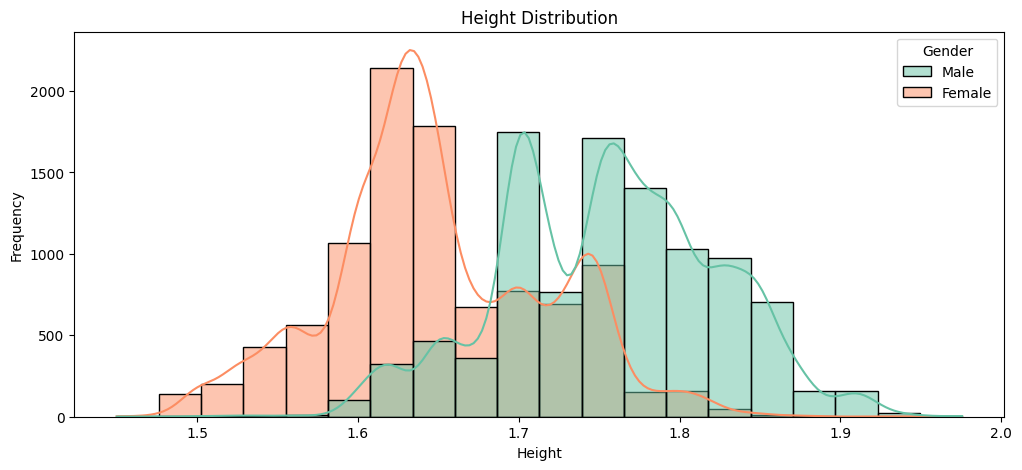

In [ ]:
figure(figsize=(12, 5))
histplot(data=train_df,	x='Height',	hue='Gender', kde=True, bins=20, palette='Set2')
title('Height Distribution')
xlabel('Height')
ylabel('Frequency')
show()

### **Gender Comparison**:

- ##### **Different Central Tendencies**: Males are generally taller than females in dataset. The primary peaks for males are at higher height values than the primary peaks for females.
- ##### **Overlapping Ranges**: While the central tendencies differ, there is an overlap in the height ranges for males and females, particularly in the 1.60 to 1.75 meter range.
- ##### **Less Spread in Females**: The height distribution for females appears to have a slightly narrower spread compared to males.

### **In summary**, this plot reveals that:

- ##### There are clear differences in the height distribution between males and females in dataset.
- ##### Males tend to be concentrated around two height ranges: 1.70-1.75 meters and 1.75-1.80 meters, with the latter being more frequent.
- ##### Females also show a bimodal distribution, concentrated around 1.60-1.65 meters and 1.65-1.70 meters, with the former being more frequent.

-----------------------

- ##### **Gender** with **Age > 30** and **Weight >= 90**

In [ ]:
GenderGt30AndWeightGte90 = train_df.loc[(train_df['Age'] > 30) & (train_df['Weight'] >= 90) , (['Age','Gender','Weight'])]

In [ ]:
GenderGt30AndWeightGte90

,Age,Gender,Weight
4,32,Male,93.798055
46,31,Male,120.998266
102,31,Male,122.813033
103,32,Male,90.000000
203,35,Female,90.000000
...,...,...,...
20583,34,Male,91.059595
20598,31,Male,112.277567
20635,31,Male,120.919703
20710,34,Male,102.134646


In [ ]:
GenderGt30AndWeightGte90['Age'].value_counts()

Age
31    550
32    160
33    154
34     68
35     29
Name: count, dtype: int64

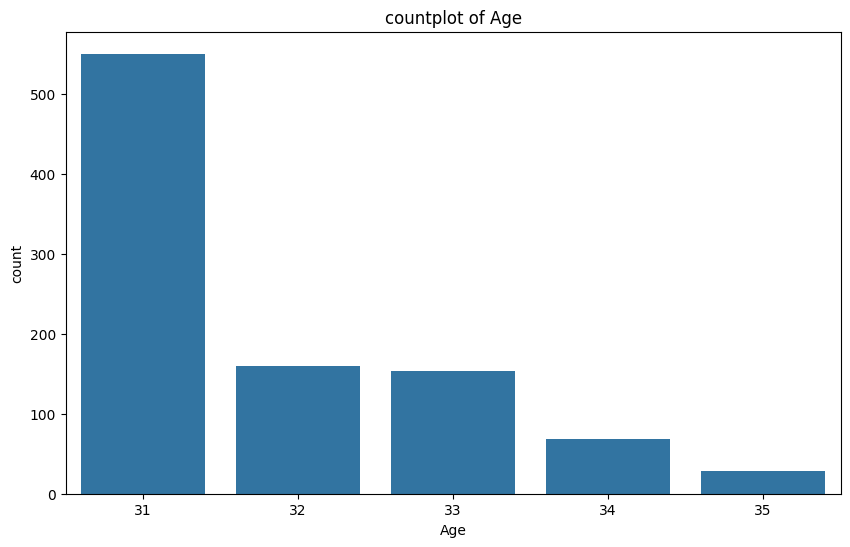

In [ ]:
figure(figsize=(10, 6))
countplot(data = GenderGt30AndWeightGte90, x = 'Age', order = GenderGt30AndWeightGte90['Age'].value_counts().index)
title('countplot of Age')
show()

In [ ]:
GenderGt30AndWeightGte90['Gender'].value_counts()

Gender
Male      955
Female      6
Name: count, dtype: int64

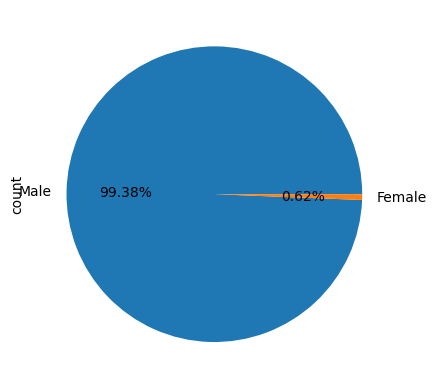

In [ ]:
GenderGt30AndWeightGte90['Gender'].value_counts().plot.pie(autopct='%0.2f%%')
show()

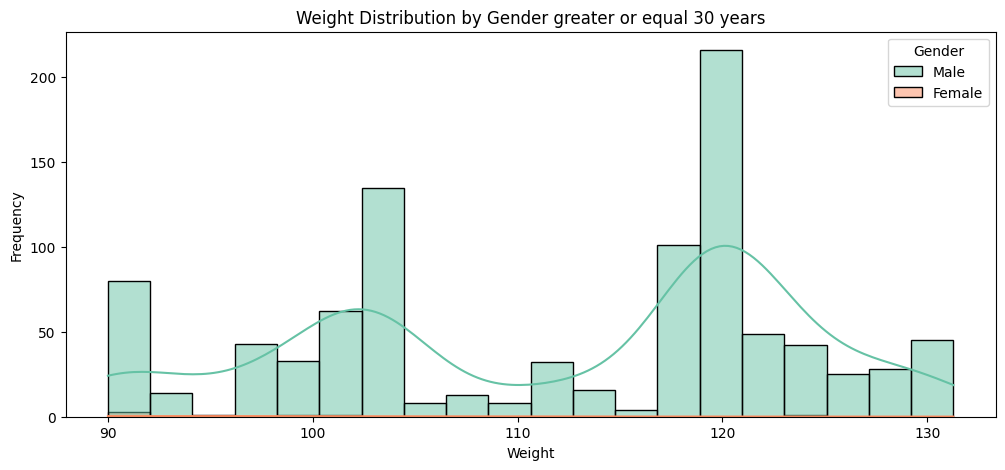

In [ ]:
figure(figsize=(12, 5))
histplot(data=GenderGt30AndWeightGte90,	x='Weight',	hue='Gender', kde=True, bins=20, palette='Set2')
title('Weight Distribution by Gender greater or equal 30 years')
xlabel('Weight')
ylabel('Frequency')
show()

### **Gender Comparison within this Weight Range**:

- ##### **Higher Prevalence of Males**: Males are significantly more represented in the weight range of 90 kg to 130 kg compared to females in dataset.
- ##### **Different Distribution Shapes**: While males show a bimodal distribution within this range, the number of females is too low to discern a clear distribution pattern.

### **This zoomed-in view of the higher weight range suggests that**:

- ##### Weights between 90 kg and 130 kg are considerably more common among males in dataset.
- ##### Within this higher weight segment for males, there are two likely subgroups with average weights around 103 kg and 121 kg.
- ##### Females are relatively rare in this higher weight range within dataset.

----------------------

- ##### **Gender** with **Age <= 30** and **Weight >= 90**

In [ ]:
GenderLte30AndWeightGte90 = train_df.loc[(train_df['Age'] <= 30) & (train_df['Weight'] >= 90) , (['Age','Gender','Weight'])]

In [ ]:
GenderLte30AndWeightGte90['Age'].value_counts()

Age
26    2860
23     849
21     833
22     630
25     517
24     505
18     454
27     303
30     291
19     215
20     202
28     144
29     116
17      66
16       1
Name: count, dtype: int64

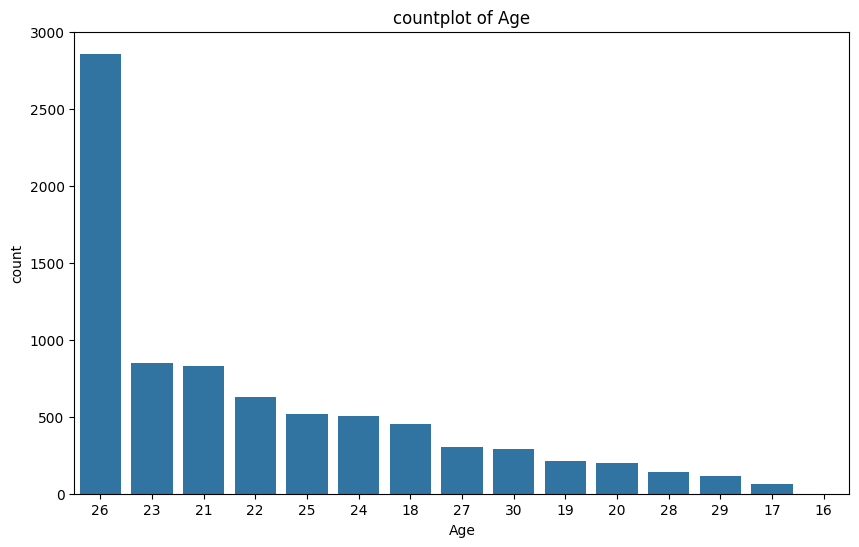

In [ ]:
figure(figsize=(10, 6))
countplot(data = GenderLte30AndWeightGte90, x = 'Age', order = GenderLte30AndWeightGte90['Age'].value_counts().index)
title('countplot of Age')
show()

In [ ]:
GenderLte30AndWeightGte90['Gender'].value_counts()

Gender
Female    4151
Male      3835
Name: count, dtype: int64

C:\Users\RPC\AppData\Local\Temp\ipykernel_15008\1799672119.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot(x='Gender', data=GenderLte30AndWeightGte90, palette=['green','red'])


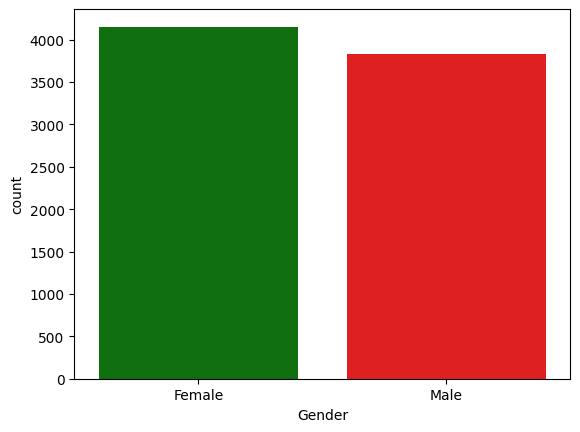

In [ ]:
countplot(x='Gender', data=GenderLte30AndWeightGte90, palette=['green','red'])
xlabel('Gender')
show()

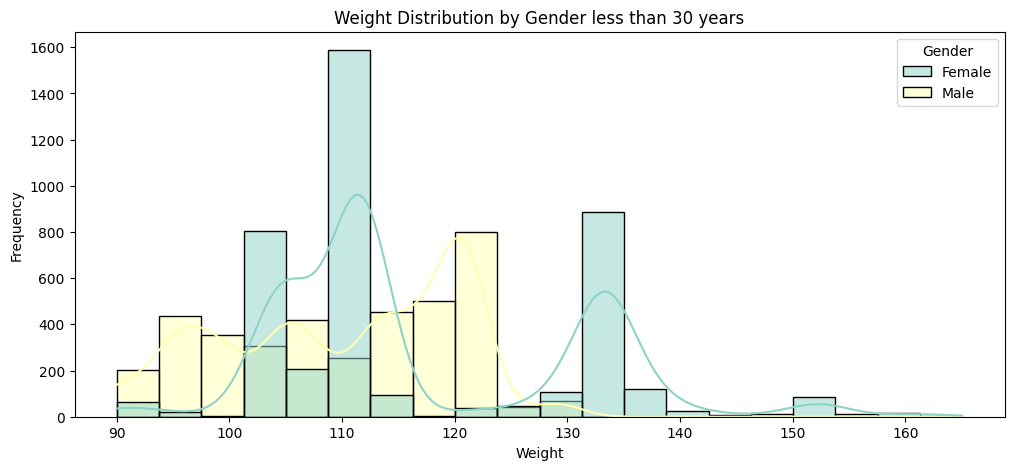

In [ ]:
figure(figsize=(12, 5))
histplot(data=GenderLte30AndWeightGte90,	x='Weight',	hue='Gender', kde=True, bins=20, palette='Set3')
title('Weight Distribution by Gender less than 30 years')
xlabel('Weight')
ylabel('Frequency')
show()

### **Gender Comparison within this Weight Range**:

- ##### **Different Primary Peaks**: Females in this higher weight segment tend to cluster more around 110-112 kg, while males tend to cluster more around 120-122 kg.
- ##### **Secondary Peak Difference**: Males show a secondary cluster at a lower weight range (95-98 kg) within this selection, whereas the secondary cluster for females is at a higher weight range (135-138 kg).
- ##### **Overlap**: There is an overlap in the weight distributions, particularly between 100 kg and 130 kg, where both genders have significant representation.
- ##### **Tail Distribution**: The distribution tails off at the higher end for both genders, indicating fewer individuals with very high weights.

### **Within the higher weight range of 90-165 kg**:

- ##### Both females and males exhibit a bimodal weight distribution, suggesting subgroups within each gender at different weight points.
- ##### Females in this range tend to have their primary weight cluster slightly lower than males.
- ##### Males show a secondary cluster at a lower weight within this selection compared to the secondary cluster for females.

------------------------

- ##### **Gender** with **Age > 30** and **Weight >= 90** and **Means of transportation used = Public_Transportation** or **Automobile**

In [ ]:
GenderGt30AndWeightGte90AndMeansTrans1 = train_df.loc[(train_df['Age'] > 30) & (train_df['Weight'] >= 90) & 
             ((train_df['Means of transportation used'] == 'Public_Transportation') | (train_df['Means of transportation used'] == 'Automobile')) , 
             (['Age','Gender','Weight','Means of transportation used'])]

In [ ]:
GenderGt30AndWeightGte90AndMeansTrans1

,Age,Gender,Weight,Means of transportation used
4,32,Male,93.798055,Public_Transportation
46,31,Male,120.998266,Public_Transportation
102,31,Male,122.813033,Public_Transportation
103,32,Male,90.000000,Automobile
203,35,Female,90.000000,Automobile
...,...,...,...,...
20583,34,Male,91.059595,Automobile
20598,31,Male,112.277567,Automobile
20635,31,Male,120.919703,Automobile
20710,34,Male,102.134646,Automobile


In [ ]:
GenderGt30AndWeightGte90AndMeansTrans1['Gender'].value_counts()

Gender
Male      949
Female      6
Name: count, dtype: int64

In [ ]:
GenderGt30AndWeightGte90AndMeansTrans1['Means of transportation used'].value_counts()

Means of transportation used
Automobile               562
Public_Transportation    393
Name: count, dtype: int64

-------------------------

- ##### **Gender** with **Age > 30** and **Weight >= 90** and **Means of transportation used = Walking** or **Bike** or **Motorbike**

In [ ]:
GenderGt30AndWeightGte90AndMeansTrans2 = train_df.loc[(train_df['Age'] > 30) & (train_df['Weight'] >= 90) & 
             ((train_df['Means of transportation used'] == 'Walking') | (train_df['Means of transportation used'] == 'Bike') | (train_df['Means of transportation used'] == 'Motorbike')) , 
             (['Age','Gender','Weight','Means of transportation used'])]

In [ ]:
GenderGt30AndWeightGte90AndMeansTrans2

,Age,Gender,Weight,Means of transportation used
3533,33,Male,91.0,Walking
4429,33,Male,97.0,Walking
17672,33,Male,91.0,Walking
17867,33,Male,113.0,Walking
18248,33,Male,97.0,Walking
18835,33,Male,103.0,Walking


----------------------------

- ##### **Gender** with **Age <= 30** and **Weight >= 90** and **Means of transportation used = Public_Transportation** or **Automobile**

In [ ]:
GenderLte30AndWeightGtet90AndMeansTrans1 = train_df.loc[(train_df['Age'] <= 30) & (train_df['Weight'] >= 90) & 
             ((train_df['Means of transportation used'] == 'Public_Transportation') | (train_df['Means of transportation used'] == 'Automobile')) , 
             (['Age','Gender','Weight','Means of transportation used'])]

In [ ]:
GenderLte30AndWeightGtet90AndMeansTrans1

,Age,Gender,Weight,Means of transportation used
3,21,Female,131.274851,Public_Transportation
6,30,Male,112.725005,Automobile
7,30,Male,118.206565,Automobile
9,26,Female,111.275646,Public_Transportation
12,18,Male,108.251044,Public_Transportation
...,...,...,...,...
20749,26,Female,104.835346,Public_Transportation
20751,21,Female,133.466763,Public_Transportation
20753,25,Male,114.187096,Public_Transportation
20755,20,Male,105.580491,Public_Transportation


In [ ]:
GenderLte30AndWeightGtet90AndMeansTrans1['Gender'].value_counts()

Gender
Female    4151
Male      3792
Name: count, dtype: int64

C:\Users\RPC\AppData\Local\Temp\ipykernel_15008\2193786380.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot(x='Gender', data=GenderLte30AndWeightGtet90AndMeansTrans1, palette=['green','red'])


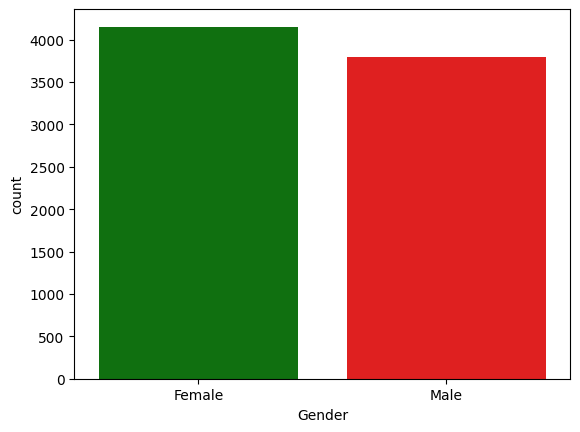

In [ ]:
countplot(x='Gender', data=GenderLte30AndWeightGtet90AndMeansTrans1, palette=['green','red'])
xlabel('Gender')
show()

In [ ]:
GenderLte30AndWeightGtet90AndMeansTrans1['Means of transportation used'].value_counts()

Means of transportation used
Public_Transportation    7449
Automobile                494
Name: count, dtype: int64

C:\Users\RPC\AppData\Local\Temp\ipykernel_15008\566136229.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot(x='Means of transportation used', data=GenderLte30AndWeightGtet90AndMeansTrans1, palette=['green','red'])


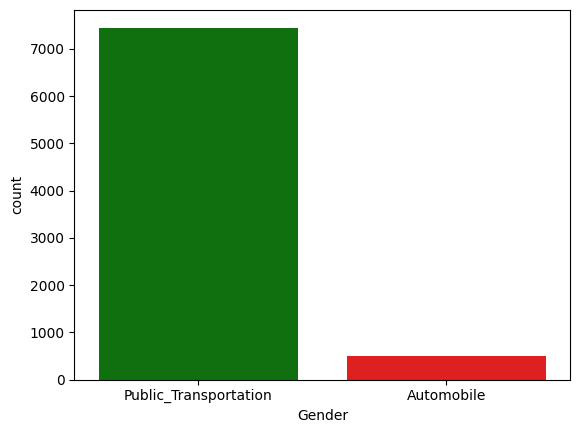

In [ ]:
countplot(x='Means of transportation used', data=GenderLte30AndWeightGtet90AndMeansTrans1, palette=['green','red'])
xlabel('Gender')
show()

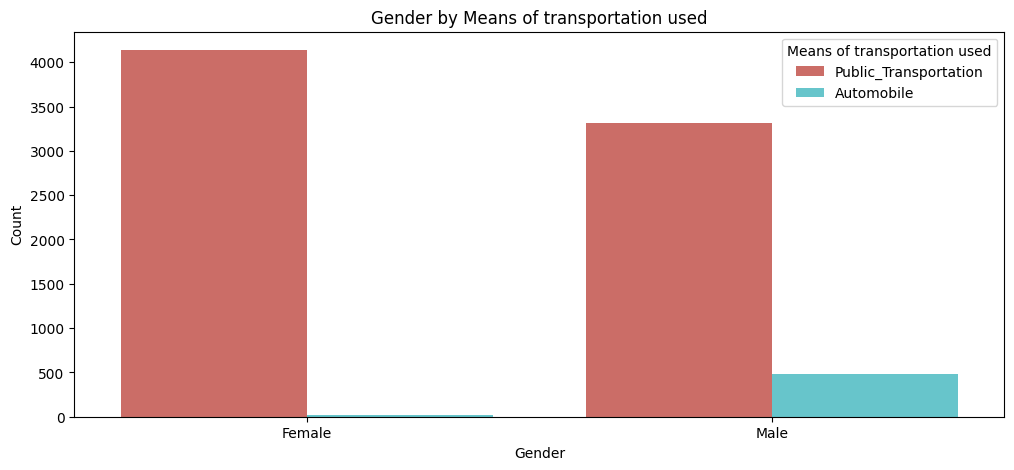

In [ ]:
figure(figsize=(12,	5))
countplot(data=GenderLte30AndWeightGtet90AndMeansTrans1, x='Gender', hue='Means of transportation used', palette="hls")
title('Gender by Means of transportation used')
xlabel('Gender')
ylabel('Count')
show()

### **For Females**:

- ##### **Public Transportation**: The vast majority of females in dataset report using public transportation. The count is significantly high, around 4150.
- ##### **Automobile**: A very small number of females report using automobiles as their means of transportation. The count is extremely low, close to zero.

### **For Males**:

- ##### **Public Transportation**: A substantial number of males also report using public transportation, with a count of approximately 3300. This is lower than the number of females using public transportation.
- ##### **Automobile**: A noticeable number of males report using automobiles for transportation, with a count of around 500. This is significantly higher than the number of females using automobiles.

### **Overall Observations**:

- ##### Public transportation is the dominant mode of transport for both genders in dataset. However, it is considerably more prevalent among females.
- ##### Automobile usage is much more common among males compared to females.

### **In summary, this chart suggests that**:

- #####  Females in this dataset overwhelmingly rely on public transportation.
- #####  While public transportation is also the primary mode for males, a non-negligible proportion of males use automobiles.
- #####  There is a clear gender difference in the preference or access to automobiles as a means of transportation in this population.

---------------------

- ##### **Gender** with **Age <= 30** and **Weight >= 90** and **Means of transportation used = Walking** or **Bike** or **Motorbike**

In [ ]:
GenderLte30AndWeightGte90AndMeansTrans2 = train_df.loc[(train_df['Age'] < 30) & (train_df['Weight'] >= 90) & 
             ((train_df['Means of transportation used'] == 'Walking') | (train_df['Means of transportation used'] == 'Bike') | (train_df['Means of transportation used'] == 'Motorbike')) , 
             (['Age','Gender','Weight','Means of transportation used'])]

In [ ]:
GenderLte30AndWeightGte90AndMeansTrans2

,Age,Gender,Weight,Means of transportation used
639,17,Male,98.000000,Walking
950,26,Male,90.000000,Walking
1288,17,Male,113.000000,Walking
1477,17,Male,97.000000,Walking
1641,17,Male,97.000000,Walking
2285,23,Male,95.000000,Walking
3482,24,Male,90.000000,Walking
3886,23,Male,105.000000,Walking
5020,23,Male,97.000000,Walking
5621,21,Male,96.000000,Motorbike


In [ ]:
GenderLte30AndWeightGte90AndMeansTrans2['Gender'].value_counts()

Gender
Male    43
Name: count, dtype: int64

In [ ]:
GenderLte30AndWeightGte90AndMeansTrans2['Means of transportation used'].value_counts()

Means of transportation used
Walking      38
Motorbike     4
Bike          1
Name: count, dtype: int64

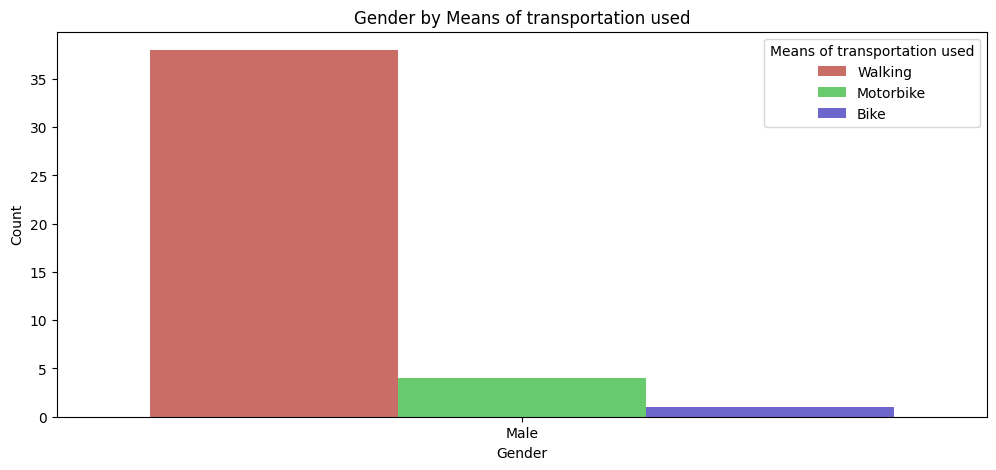

In [ ]:
figure(figsize=(12,	5))
countplot(data=GenderLte30AndWeightGte90AndMeansTrans2, x='Gender', hue='Means of transportation used', palette="hls")
title('Gender by Means of transportation used')
xlabel('Gender')
ylabel('Count')
show()

### **For Males**:

- ##### **Walking (Red Bar)**: Walking is the most frequently reported means of transportation among males shown in this chart, with a count of approximately 38.
- ##### **Motorbike (Green Bar)**: Motorbike usage is considerably less frequent than walking, with a count of around 4.
- ##### **Bike (Blue Bar)**: Bike usage is the least frequent among these three options for males, with a count of only 1.

### **Overall Observations for Males (based on this chart)**:

- ##### Walking is the dominant form of non-motorized/light motorized transportation reported by males in this subset of your data.
- ##### Motorbike usage is present but significantly lower than walking.
- ##### Bike usage is very minimal among the males represented here.

### **Important Considerations**:

- ##### This chart only shows data for males. There is no information about females and their usage of these transportation methods in this particular visualization.
- ##### The scale of the y-axis (Count) is relatively small (up to 40). This suggests that this chart might be focusing on a specific subset of your overall data or that these particular modes of transportation are not very common in the broader population you are studying, at least for males.
- ##### This is different from the previous chart which focused on Public Transportation and Automobile.

### **In summary, for the males represented in this specific chart:**

- ##### Walking is the most common of the three transportation methods shown.
- ##### Motorbike usage is present but much lower.
- ##### Bike usage is very rare.

--------------------

- ##### **Gender** with **Age > 30** and **Weight >= 90** and **Number of main meals the person eats per day = 3** or **4** 

In [ ]:
GenderGt30AndWeightGte90AndNumberMealsPerDay1 = train_df.loc[(train_df['Age'] > 30) & (train_df['Weight'] >= 90) & 
             ((train_df['Number of main meals the person eats per day'] == 3) | (train_df['Number of main meals the person eats per day'] == 4)) , 
             (['Age','Gender','Weight','Number of main meals the person eats per day'])]

In [ ]:
GenderGt30AndWeightGte90AndNumberMealsPerDay1

,Age,Gender,Weight,Number of main meals the person eats per day
46,31,Male,120.998266,3
102,31,Male,122.813033,3
203,35,Female,90.000000,3
206,32,Male,120.158049,3
208,32,Male,119.441207,3
...,...,...,...,...
20553,32,Male,128.114161,3
20583,34,Male,91.059595,3
20598,31,Male,112.277567,3
20635,31,Male,120.919703,3


In [ ]:
GenderGt30AndWeightGte90AndNumberMealsPerDay1['Gender'].value_counts()

Gender
Male      756
Female      4
Name: count, dtype: int64

C:\Users\RPC\AppData\Local\Temp\ipykernel_15008\1549736959.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot(x='Gender', data=GenderGt30AndWeightGte90AndNumberMealsPerDay1, palette=['green','red'])


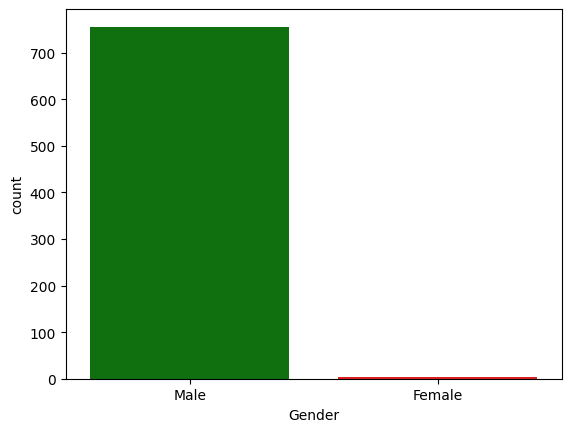

In [ ]:
countplot(x='Gender', data=GenderGt30AndWeightGte90AndNumberMealsPerDay1, palette=['green','red'])
xlabel('Gender')
show()

In [ ]:
GenderGt30AndWeightGte90AndNumberMealsPerDay1['Number of main meals the person eats per day'].value_counts()

Number of main meals the person eats per day
3    754
4      6
Name: count, dtype: int64

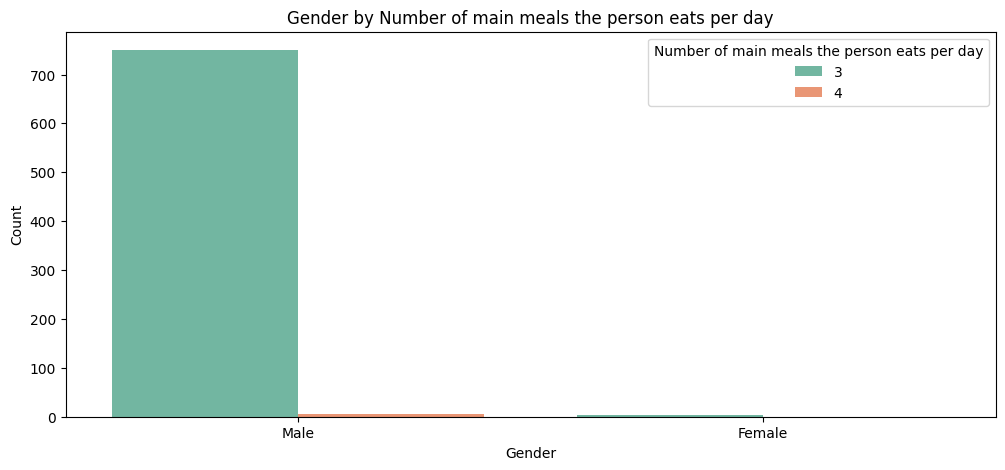

In [ ]:
figure(figsize=(12,	5))
countplot(data=GenderGt30AndWeightGte90AndNumberMealsPerDay1, x='Gender', hue='Number of main meals the person eats per day', palette="Set2")
title('Gender by Number of main meals the person eats per day')
xlabel('Gender')
ylabel('Count')
show()

### **For Males**:

- ##### **3 main meals per day (Teal Bar)**: A very high number of males reported eating 3 main meals per day, with a count of approximately 760.
- ##### **4 main meals per day (Salmon Bar)**: A very small number of males reported eating 4 main meals per day, with a count of less than 10.

### **For Females**:

- ##### **3 main meals per day (Teal Bar)**: A very small number of females reported eating 3 main meals per day, with a count of less than 10.
- ##### **4 main meals per day (Salmon Bar)**: The chart doesn't show a bar for females eating 4 main meals, implying the count is either zero or too small to be visible.

### Overall Observations:

- ##### Eating 3 main meals per day is overwhelmingly more common than eating 4 main meals per day in this subset of your data.
- ##### Males are much more likely to report eating 3 main meals per day compared to females.
- ##### Eating 4 main meals per day appears to be very rare for both genders in this specific view, but slightly more prevalent among the few who reported it were males.

### **Important Considerations**:

- ##### This chart only shows data for individuals reporting exactly 3 or 4 main meals. It doesn't include those who might eat fewer than 3 or more than 4 main meals.
- ##### The counts for females in both categories (and males eating 4 meals) are very low. This might indicate a genuine trend in your data or could be due to a smaller sample size for these specific categories.

### **In summary, based on this chart**:

- ##### The vast majority of individuals reporting their meal frequency as either 3 or 4 main meals per day are males eating 3 meals.
- ##### Eating 4 main meals is uncommon.
- ##### Females in this specific view predominantly (almost exclusively) do not fall into either the "3 main meals" or "4 main meals" category - as represented here, suggesting they might have reported a different number of main meals.

-----------------------

- ##### **Gender** with **Age <= 30** and **Weight >= 90** and **Number of main meals the person eats per day = 3** or **4** 

In [ ]:
GenderLte30AndWeightGte90AndNumberMealsPerDay2 = train_df.loc[(train_df['Age'] <= 30) & (train_df['Weight'] >= 90) & 
             ((train_df['Number of main meals the person eats per day'] == 3) | (train_df['Number of main meals the person eats per day'] == 4)) , 
             (['Age','Gender','Weight','Number of main meals the person eats per day'])]

In [ ]:
GenderLte30AndWeightGte90AndNumberMealsPerDay2

,Age,Gender,Weight,Number of main meals the person eats per day
3,21,Female,131.274851,3
6,30,Male,112.725005,3
7,30,Male,118.206565,3
9,26,Female,111.275646,3
13,21,Female,131.529267,3
...,...,...,...,...
20749,26,Female,104.835346,3
20751,21,Female,133.466763,3
20753,25,Male,114.187096,3
20755,20,Male,105.580491,3


In [ ]:
GenderLte30AndWeightGte90AndNumberMealsPerDay2['Gender'].value_counts()

Gender
Female    4134
Male      3242
Name: count, dtype: int64

C:\Users\RPC\AppData\Local\Temp\ipykernel_15008\1141836588.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot(x='Gender', data=GenderLte30AndWeightGte90AndNumberMealsPerDay2, palette=['green','red'])


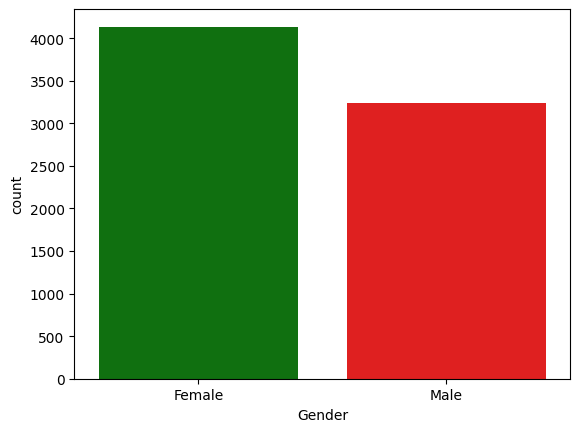

In [ ]:
countplot(x='Gender', data=GenderLte30AndWeightGte90AndNumberMealsPerDay2, palette=['green','red'])
xlabel('Gender')
show()

In [ ]:
GenderLte30AndWeightGte90AndNumberMealsPerDay2['Number of main meals the person eats per day'].value_counts()

Number of main meals the person eats per day
3    7355
4      21
Name: count, dtype: int64

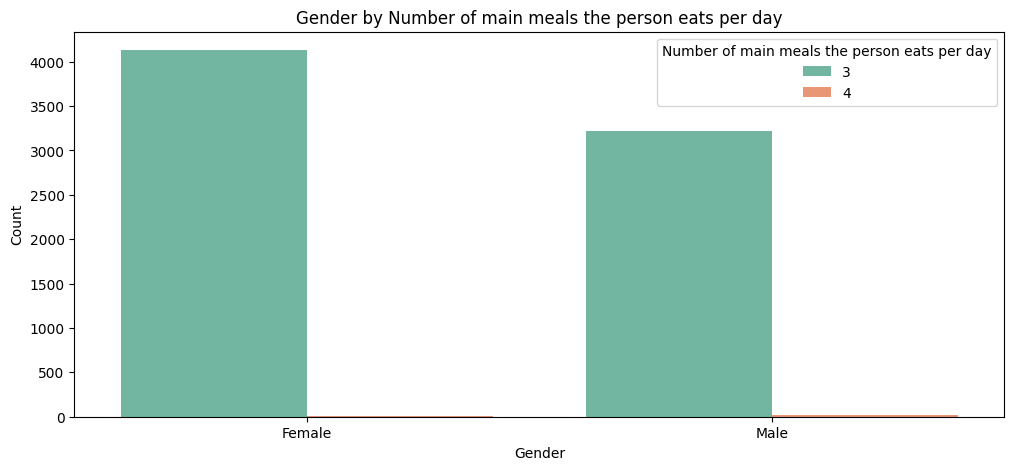

In [ ]:
figure(figsize=(12,	5))
countplot(data=GenderLte30AndWeightGte90AndNumberMealsPerDay2, x='Gender', hue='Number of main meals the person eats per day', palette="Set2")
title('Gender by Number of main meals the person eats per day')
xlabel('Gender')
ylabel('Count')
show()

### **For Females**:

- ##### **3 main meals per day (Teal Bar)**: A very high number of females reported eating 3 main meals per day, with a count of approximately 4150.
- ##### **4 main meals per day (Salmon Bar)**: A very small number of females reported eating 4 main meals per day, with a count very close to zero.

### **For Males**:

- ##### **3 main meals per day (Teal Bar)**: A substantial number of males also reported eating 3 main meals per day, with a count of approximately 3200. This is lower than the number of females reporting 3 meals.
- ##### **4 main meals per day (Salmon Bar)**: A very small number of males also reported eating 4 main meals per day, with a count very close to zero.

### **Overall Observations**:

- ##### Eating 3 main meals per day is the overwhelmingly dominant pattern for both genders in this view of data.
- ##### Females are more likely to report eating 3 main meals per day compared to males.
- ##### Eating 4 main meals per day is very rare for both genders based on this chart.

### **Comparison with the Previous Chart:**

- ##### The counts in this chart are significantly higher than in the previous one, suggesting this might represent a larger portion of dataset.
- ##### The trend remains the same: 3 main meals are much more common than 4, and females show a higher count for 3 meals compared to males.

### **In summary, based on this chart**:

- ##### The vast majority of both males and females in this dataset report eating 3 main meals per day.
- ##### A very small fraction of both genders report eating 4 main meals per day.
- ##### Females have a higher frequency of reporting 3 main meals per day compared to males.

--------------------------------------

- ##### **Gender** with **Age > 30** and **Weight >= 90** and **Physical activity frequency Classes = No physical activity** or **Very low activity** 

In [ ]:
GenderGt30AndWeightGte90AndPhysicalActivity1 = train_df.loc[(train_df['Age'] > 30) & (train_df['Weight'] >= 90) & 
             ((train_df['Physical activity frequency Classes'] == 'No physical activity') | (train_df['Physical activity frequency Classes'] == 'Very low activity')) , 
             (['Age','Gender','Weight','Physical activity frequency Classes'])]

In [ ]:
GenderGt30AndWeightGte90AndPhysicalActivity1

,Age,Gender,Weight,Physical activity frequency Classes
4,32,Male,93.798055,Very low activity
46,31,Male,120.998266,Very low activity
102,31,Male,122.813033,No physical activity
103,32,Male,90.000000,Very low activity
203,35,Female,90.000000,Very low activity
...,...,...,...,...
20547,31,Male,118.424156,No physical activity
20553,32,Male,128.114161,No physical activity
20598,31,Male,112.277567,No physical activity
20635,31,Male,120.919703,No physical activity


In [ ]:
GenderGt30AndWeightGte90AndPhysicalActivity1['Gender'].value_counts()

Gender
Male      926
Female      6
Name: count, dtype: int64

C:\Users\RPC\AppData\Local\Temp\ipykernel_15008\3618581145.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot(x='Gender', data=GenderGt30AndWeightGte90AndPhysicalActivity1, palette=['green','red'])


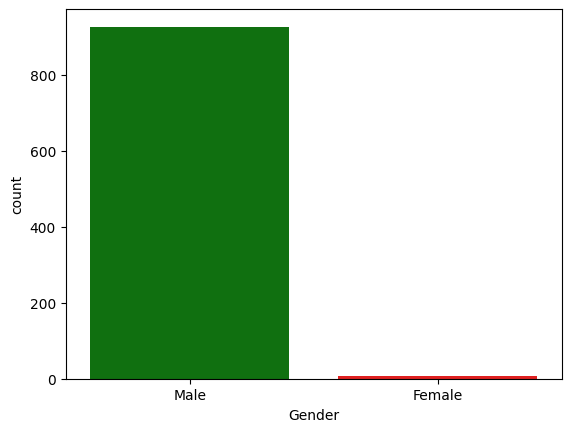

In [ ]:
countplot(x='Gender', data=GenderGt30AndWeightGte90AndPhysicalActivity1, palette=['green','red'])
xlabel('Gender')
show()

In [ ]:
GenderGt30AndWeightGte90AndPhysicalActivity1['Physical activity frequency Classes'].value_counts()

Physical activity frequency Classes
No physical activity    494
Very low activity       438
Name: count, dtype: int64

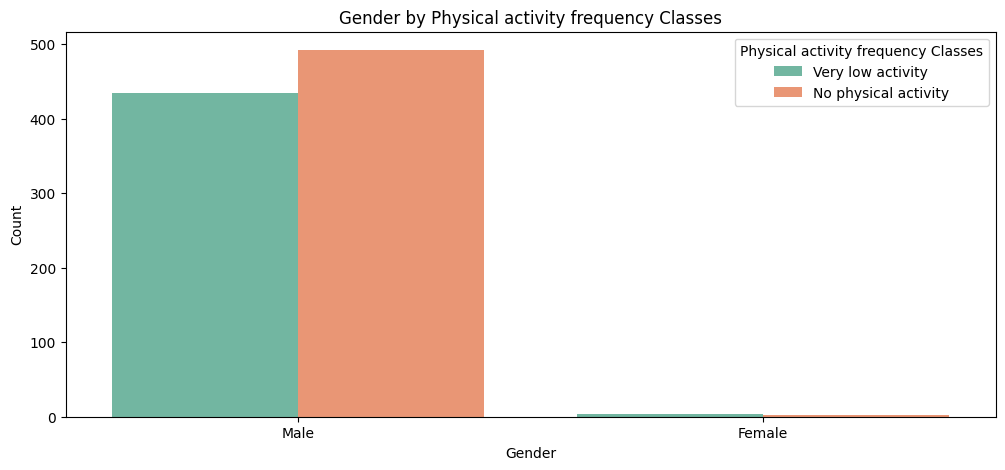

In [ ]:
figure(figsize=(12,	5))
countplot(data=GenderGt30AndWeightGte90AndPhysicalActivity1, x='Gender', hue='Physical activity frequency Classes', palette="Set2")
title('Gender by Physical activity frequency Classes')
xlabel('Gender')
ylabel('Count')
show()

### **For Males**:

- ##### **Very low activity (Teal Bar):** A significant number of males are classified as having "Very low activity," with a count of approximately 435.
- ##### **No physical activity (Salmon Bar)**: An even larger number of males are classified as having "No physical activity," with a count of approximately 490.

### **For Females**:

- ##### **Very low activity (Teal Bar)**: A very small number of females are classified as having "Very low activity," with a count close to zero but slightly above it.
- ##### **No physical activity (Salmon Bar)**: A very small number of females are also classified as having "No physical activity," with a count close to zero but slightly above it.

### **Overall Observations (focusing on these two activity levels)**:

- ##### **For males**, "No physical activity" is slightly more prevalent than "Very low activity."
- ##### **For females**, both "Very low activity" and "No physical activity" are very rare compared to males. The counts are close to zero on the scale of this chart.
- ##### There is a substantial gender difference in the prevalence of these lower levels of physical activity. Males show considerably higher counts in both the "Very low activity" and "No physical activity" categories compared to females.

- ##### Important Considerations:

- ##### This chart only focuses on two specific categories of physical activity frequency. It doesn't provide information about individuals with "Low to moderate activity" or "Moderate activity."
- ##### The scale of the y-axis (Count) goes up to 500. This allows us to see the relative differences between male counts and the very low female counts.

### **In summary, based on this chart**:

- ##### Among males, "No physical activity" is slightly more common than "Very low activity."
- ##### Both "Very low activity" and "No physical activity" appear to be uncommon among females in this specific view of the data.
- ##### Males in this dataset are much more likely to report either "Very low activity" or "No physical activity" compared to females.

--------------------------------------

- ##### **Gender** with **Age <= 30** and **Weight >= 90** and **Physical activity frequency Classes = No physical activity** or **Very low activity** 

In [ ]:
GenderLte30AndWeightGte90AndPhysicalActivity1 = train_df.loc[(train_df['Age'] <= 30) & (train_df['Weight'] >= 90) & 
             ((train_df['Physical activity frequency Classes'] == 'No physical activity') | (train_df['Physical activity frequency Classes'] == 'Very low activity')) , 
             (['Age','Gender','Weight','Physical activity frequency Classes'])]

In [ ]:
GenderLte30AndWeightGte90AndPhysicalActivity1

,Age,Gender,Weight,Physical activity frequency Classes
3,21,Female,131.274851,Very low activity
6,30,Male,112.725005,No physical activity
7,30,Male,118.206565,No physical activity
9,26,Female,111.275646,No physical activity
12,18,Male,108.251044,Very low activity
...,...,...,...,...
20749,26,Female,104.835346,No physical activity
20751,21,Female,133.466763,Very low activity
20753,25,Male,114.187096,Very low activity
20755,20,Male,105.580491,Very low activity


In [ ]:
GenderLte30AndWeightGte90AndPhysicalActivity1['Gender'].value_counts()

Gender
Female    4133
Male      3422
Name: count, dtype: int64

C:\Users\RPC\AppData\Local\Temp\ipykernel_15008\3827297360.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot(x='Gender', data=GenderLte30AndWeightGte90AndPhysicalActivity1, palette=['green','red'])


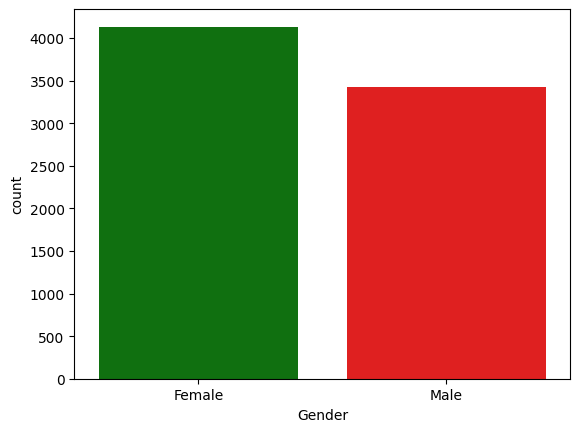

In [ ]:
countplot(x='Gender', data=GenderLte30AndWeightGte90AndPhysicalActivity1, palette=['green','red'])
xlabel('Gender')
show()

In [ ]:
GenderLte30AndWeightGte90AndPhysicalActivity1['Physical activity frequency Classes'].value_counts()

Physical activity frequency Classes
No physical activity    4351
Very low activity       3204
Name: count, dtype: int64

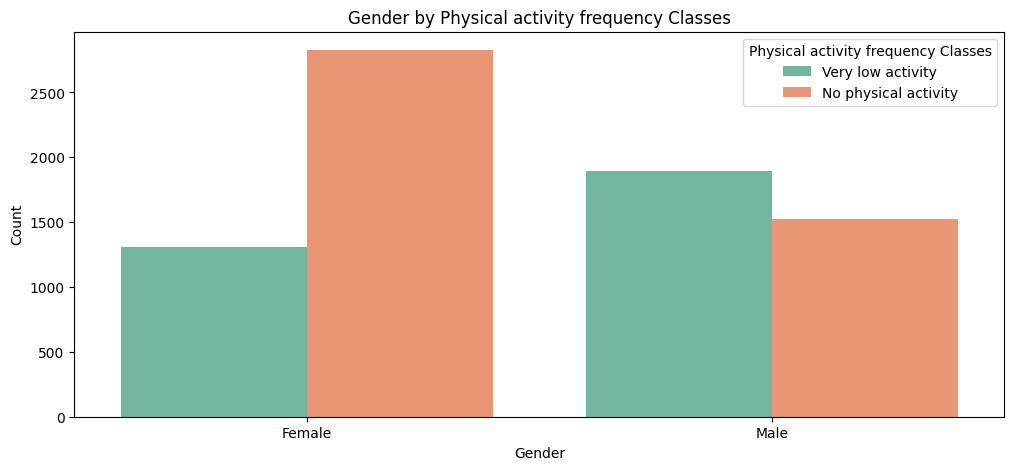

In [ ]:
figure(figsize=(12,	5))
countplot(data=GenderLte30AndWeightGte90AndPhysicalActivity1, x='Gender', hue='Physical activity frequency Classes', palette="Set2")
title('Gender by Physical activity frequency Classes')
xlabel('Gender')
ylabel('Count')
show()

### **For Females**:

- ##### **Very low activity (Teal Bar)**: Approximately 1300 females are classified as having "Very low activity."
- ##### **No physical activity (Salmon Bar)**: A much larger number of females are classified as having "No physical activity," with a count of around 2850.

### **For Males**:

- ##### **Very low activity (Teal Bar)**: Approximately 1900 males are classified as having "Very low activity." This is higher than the number of females in the same category.
- ##### **No physical activity (Salmon Bar)**: Approximately 1500 males are classified as having "No physical activity." This is lower than the number of females in the same category.

### **Overall Observations (focusing on these two activity levels)**:

- ##### **For females**, "No physical activity" is significantly more prevalent than "Very low activity."
- ##### **For males**, "Very low activity" is more prevalent than "No physical activity."
- ##### There is a clear gender difference in the distribution of these lower levels of physical activity. A higher proportion of females in this view report "No physical activity," while a higher proportion of males report "Very low activity."

### **Important Considerations**:

- ##### This chart only focuses on two specific categories of physical activity frequency. It doesn't provide information about individuals with "Low to moderate activity" or "Moderate activity."
- ##### The scale of the y-axis (Count) goes up to 3000. This allows us to see the substantial counts in these categories.

### **In summary, based on this chart**:

- ##### **Among females**, the dominant lower physical activity level is "No physical activity."
- ##### **Among males**, the more common lower physical activity level is "Very low activity."
- ##### Females in dataset are more likely to report "No physical activity" compared to males, while males are more likely to report "Very low activity" compared to females, within these two categories.

--------------------------------------

- ##### **Gender** with **Age > 30** and **Weight >= 90** and **Physical activity frequency Classes = Low to moderate activity** or **Moderate activity** 

In [ ]:
GenderGt30AndWeightGte90AndPhysicalActivity2 = train_df.loc[(train_df['Age'] > 30) & (train_df['Weight'] >= 90) & 
             ((train_df['Physical activity frequency Classes'] == 'Low to moderate activity') | (train_df['Physical activity frequency Classes'] == 'Moderate activity')) , 
             (['Age','Gender','Weight','Physical activity frequency Classes'])]

In [ ]:
GenderGt30AndWeightGte90AndPhysicalActivity2

,Age,Gender,Weight,Physical activity frequency Classes
460,33,Male,97.000000,Low to moderate activity
2612,34,Male,90.000000,Low to moderate activity
3547,33,Male,97.000000,Low to moderate activity
4438,34,Male,120.000000,Low to moderate activity
5920,32,Male,102.781971,Low to moderate activity
5923,34,Male,98.790167,Low to moderate activity
6454,33,Male,97.813023,Low to moderate activity
6460,33,Male,97.544696,Low to moderate activity
7186,33,Male,97.592949,Low to moderate activity
7474,33,Male,97.000000,Moderate activity


In [ ]:
GenderGt30AndWeightGte90AndPhysicalActivity2['Gender'].value_counts()

Gender
Male    29
Name: count, dtype: int64

In [ ]:
GenderGt30AndWeightGte90AndPhysicalActivity2['Physical activity frequency Classes'].value_counts()

Physical activity frequency Classes
Low to moderate activity    27
Moderate activity            2
Name: count, dtype: int64

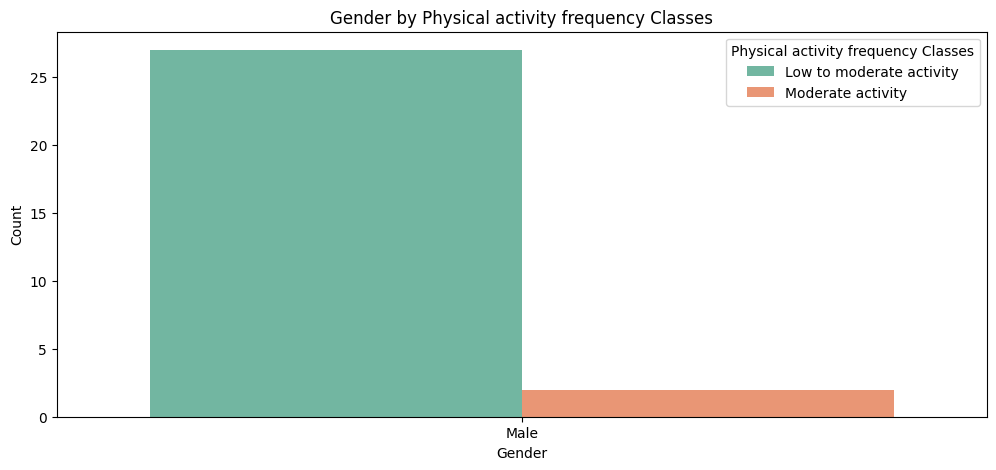

In [ ]:
figure(figsize=(12,	5))
countplot(data=GenderGt30AndWeightGte90AndPhysicalActivity2, x='Gender', hue='Physical activity frequency Classes', palette="Set2")
title('Gender by Physical activity frequency Classes')
xlabel('Gender')
ylabel('Count')
show()

### **For Males**:

- ##### **Low to moderate activity (Teal Bar)**: Approximately 27 males are classified as having "Low to moderate activity."
- ##### **Moderate activity (Salmon Bar)**: Approximately 2 males are classified as having "Moderate activity."

### Overall Observations for Males (based on this chart):

- ##### Within these two higher activity categories, "Low to moderate activity" is significantly more prevalent among males compared to "Moderate activity."

### **Important Considerations**:

- ##### This chart only shows data for males. There is no information about females and their activity levels in these categories in this particular visualization.
- ##### The scale of the y-axis (Count) is relatively small (up to 30). This suggests that these higher activity levels might be less common in the male subset represented here compared to the lower activity levels we saw in previous charts.
- ##### This is another slice of the overall physical activity frequency data by gender.

### **In summary, for the males represented in this specific chart**:

- ##### "Low to moderate activity" is reported by a noticeable number of individuals.
- ##### "Moderate activity" is reported by a much smaller number of individuals.

--------------------------------------

- ##### **Gender** with **Age <= 30** and **Weight >= 90** and **Physical activity frequency Classes = Low to moderate activity** or **Moderate activity** 

In [ ]:
GenderLte30AndWeightGte90AndPhysicalActivity2 = train_df.loc[(train_df['Age'] <= 30) & (train_df['Weight'] >= 90) & 
             ((train_df['Physical activity frequency Classes'] == 'Low to moderate activity') | (train_df['Physical activity frequency Classes'] == 'Moderate activity')) , 
             (['Age','Gender','Weight','Physical activity frequency Classes'])]

In [ ]:
GenderLte30AndWeightGte90AndPhysicalActivity2

,Age,Gender,Weight,Physical activity frequency Classes
31,23,Male,97.000000,Moderate activity
79,22,Male,105.000000,Low to moderate activity
99,18,Male,95.000000,Low to moderate activity
110,22,Male,95.000000,Moderate activity
143,20,Male,105.025808,Low to moderate activity
...,...,...,...,...
20550,26,Male,103.000000,Moderate activity
20614,18,Male,90.000000,Low to moderate activity
20713,25,Male,114.000000,Low to moderate activity
20729,22,Male,98.447311,Low to moderate activity


In [ ]:
GenderLte30AndWeightGte90AndPhysicalActivity2['Gender'].value_counts()

Gender
Male      413
Female     18
Name: count, dtype: int64

C:\Users\RPC\AppData\Local\Temp\ipykernel_15008\198168235.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot(x='Gender', data=GenderLte30AndWeightGte90AndPhysicalActivity2, palette=['green','red'])


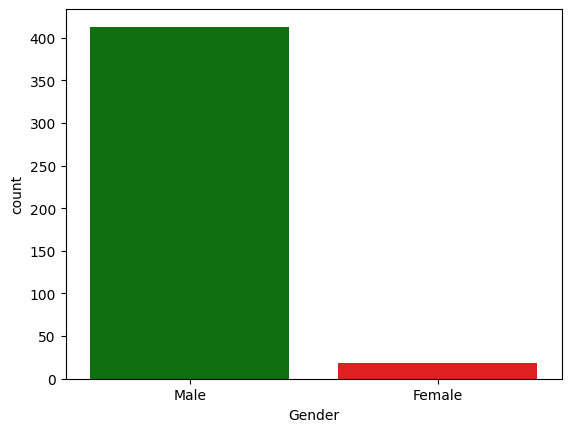

In [ ]:
countplot(x='Gender', data=GenderLte30AndWeightGte90AndPhysicalActivity2, palette=['green','red'])
xlabel('Gender')
show()

In [ ]:
GenderLte30AndWeightGte90AndPhysicalActivity2['Physical activity frequency Classes'].value_counts()

Physical activity frequency Classes
Low to moderate activity    288
Moderate activity           143
Name: count, dtype: int64

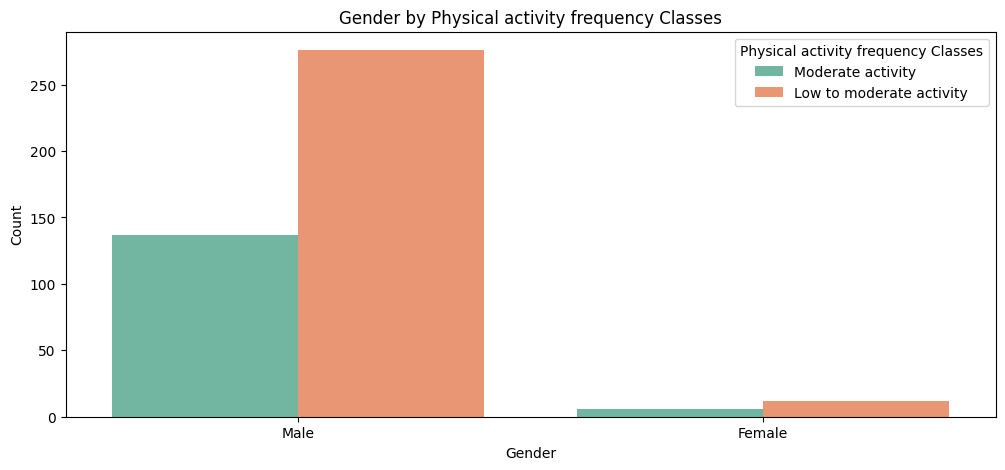

In [ ]:
figure(figsize=(12,	5))
countplot(data=GenderLte30AndWeightGte90AndPhysicalActivity2, x='Gender', hue='Physical activity frequency Classes', palette="Set2")
title('Gender by Physical activity frequency Classes')
xlabel('Gender')
ylabel('Count')
show()

### **For Males**:

- ##### **Moderate activity (Teal Bar)**: Approximately 135 males are classified as having "Moderate activity."
- ##### **Low to moderate activity (Salmon Bar)**: A much larger number of males are classified as having "Low to moderate activity," with a count of around 280.

### **For Females**:

- ##### **Moderate activity (Teal Bar)**: A very small number of females are classified as having "Moderate activity," with a count of less than 10.
- ##### **Low to moderate activity (Salmon Bar)**: A small number of females are classified as having "Low to moderate activity," with a count of around 12.

### **Overall Observations (focusing on these two activity levels)**:

- ##### **For males**, "Low to moderate activity" is considerably more prevalent than "Moderate activity."
- ##### **For females**, both "Moderate activity" and "Low to moderate activity" have very low counts compared to males.
- ##### There is a substantial gender difference in the prevalence of these higher levels of physical activity. Males show much higher counts in both the "Moderate activity" and "Low to moderate activity" categories compared to females.

### **Important Considerations:**

- ##### This chart only focuses on two specific categories of physical activity frequency. It doesn't provide information about individuals with "No physical activity" or "Very low activity."
- ##### The scale of the y-axis (Count) goes up to 300. This allows us to see the relative differences between male and female counts in these categories.

### **In summary, based on this chart**:

- ##### Among males, "Low to moderate activity" is the more common of the two higher activity levels shown.
- ##### Both "Moderate activity" and "Low to moderate activity" are relatively rare among females in this specific view of the data.
- ##### Males in dataset are much more likely to report "Moderate activity" or "Low to moderate activity" compared to females.

------------------------
-----------------------

## **Transform Data**

-----------------------

##### **Spliting data to number and object**

In [ ]:
object_train_data = train_df.select_dtypes(include='object')
non_object_train_data = train_df.select_dtypes(exclude='object')

In [ ]:
object_train_data

,Gender,Family history with overweight,Frequent consumption of high-caloric food,Consumption of food between meals,SMOKE,Whether the person takes calorie supplements,Alcohol consumption,Means of transportation used,Obesity level class,Frequency of vegetable consumption Classes,Number of main meals the person eats per day Classes,Daily water consumption Classes,Physical activity frequency Classes,Time spent using technology Classes
0,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II,Sometimes consumes vegetables,Three meals per day,Moderate water intake,No physical activity,Very low screen time
1,Female,yes,yes,Frequently,no,no,no,Automobile,Normal_Weight,Sometimes consumes vegetables,Three meals per day,Moderate water intake,Very low activity,Very low screen time
2,Female,yes,yes,Sometimes,no,no,no,Public_Transportation,Insufficient_Weight,Sometimes consumes vegetables,One meal per day,Low water intake,No physical activity,Very low screen time
3,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III,Regularly consumes vegetables,Three meals per day,Low water intake,Very low activity,Very low screen time
4,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II,Regularly consumes vegetables,Two meals per day,Low water intake,Very low activity,Very low screen time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_II,Regularly consumes vegetables,Three meals per day,Moderate water intake,Very low activity,Very low screen time
20754,Male,no,yes,Frequently,no,no,Sometimes,Public_Transportation,Insufficient_Weight,Regularly consumes vegetables,More than three meals,Low water intake,Low to moderate activity,Very low screen time
20755,Male,yes,yes,Sometimes,no,no,no,Public_Transportation,Obesity_Type_II,Sometimes consumes vegetables,Three meals per day,Moderate water intake,Very low activity,Very low screen time
20756,Male,yes,yes,Sometimes,no,no,no,Automobile,Overweight_Level_II,Regularly consumes vegetables,Two meals per day,Moderate water intake,No physical activity,Very low screen time


##### **Spliting object data to object data with 2 uniques and object data Gt 2 uniques**

In [ ]:
for col in object_train_data.columns:
    if object_train_data[col].nunique() == 2  :
        print(f'{col} : {object_train_data[col].nunique()}')

Gender : 2
Family history with overweight : 2
Frequent consumption of high-caloric food : 2
SMOKE : 2
Whether the person takes calorie supplements : 2
Time spent using technology Classes : 2


In [ ]:
object_train_data_with_2_uniques = object_train_data[['Gender','Family history with overweight','Frequent consumption of high-caloric food','SMOKE',
                                                      'Whether the person takes calorie supplements','Time spent using technology Classes']]

In [ ]:
label = LabelEncoder()
for col in range(0,object_train_data_with_2_uniques.shape[1]):
    object_train_data_with_2_uniques.iloc[:,col] = label.fit_transform(object_train_data_with_2_uniques.iloc[:,col])
object_train_data_with_2_uniques = object_train_data_with_2_uniques.astype(int)

In [ ]:
object_train_data_with_2_uniques

,Gender,Family history with overweight,Frequent consumption of high-caloric food,SMOKE,Whether the person takes calorie supplements,Time spent using technology Classes
0,1,1,1,0,0,1
1,0,1,1,0,0,1
2,0,1,1,0,0,1
3,0,1,1,0,0,1
4,1,1,1,0,0,1
...,...,...,...,...,...,...
20753,1,1,1,0,0,1
20754,1,0,1,0,0,1
20755,1,1,1,0,0,1
20756,1,1,1,0,0,1


In [ ]:
object_train_data_with_2_uniques.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19729 entries, 0 to 20757
Data columns (total 6 columns):
 #   Column                                        Non-Null Count  Dtype
---  ------                                        --------------  -----
 0   Gender                                        19729 non-null  int32
 1   Family history with overweight                19729 non-null  int32
 2   Frequent consumption of high-caloric food     19729 non-null  int32
 3   SMOKE                                         19729 non-null  int32
 4   Whether the person takes calorie supplements  19729 non-null  int32
 5   Time spent using technology Classes           19729 non-null  int32
dtypes: int32(6)
memory usage: 616.5 KB


In [ ]:
# # saving label
# with open('label.pkl' , 'wb') as f :
#     dump(label, f)

-------------------------

In [ ]:
for col in object_train_data.columns:
    if object_train_data[col].nunique()  > 2 :
        print(f'{col} : {object_train_data[col].nunique()}')

Consumption of food between meals : 4
Alcohol consumption : 3
Means of transportation used : 5
Obesity level class : 7
Frequency of vegetable consumption Classes : 3
Number of main meals the person eats per day Classes : 4
Daily water consumption Classes : 3
Physical activity frequency Classes : 4


In [ ]:
object_train_data_Gt_2_nuniques = object_train_data[['Consumption of food between meals','Alcohol consumption','Means of transportation used','Obesity level class','Frequency of vegetable consumption Classes','Number of main meals the person eats per day Classes','Daily water consumption Classes','Physical activity frequency Classes']]

In [ ]:
object_train_data_Gt_2_nuniques

,Consumption of food between meals,Alcohol consumption,Means of transportation used,Obesity level class,Frequency of vegetable consumption Classes,Number of main meals the person eats per day Classes,Daily water consumption Classes,Physical activity frequency Classes
0,Sometimes,Sometimes,Public_Transportation,Overweight_Level_II,Sometimes consumes vegetables,Three meals per day,Moderate water intake,No physical activity
1,Frequently,no,Automobile,Normal_Weight,Sometimes consumes vegetables,Three meals per day,Moderate water intake,Very low activity
2,Sometimes,no,Public_Transportation,Insufficient_Weight,Sometimes consumes vegetables,One meal per day,Low water intake,No physical activity
3,Sometimes,Sometimes,Public_Transportation,Obesity_Type_III,Regularly consumes vegetables,Three meals per day,Low water intake,Very low activity
4,Sometimes,Sometimes,Public_Transportation,Overweight_Level_II,Regularly consumes vegetables,Two meals per day,Low water intake,Very low activity
...,...,...,...,...,...,...,...,...
20753,Sometimes,Sometimes,Public_Transportation,Obesity_Type_II,Regularly consumes vegetables,Three meals per day,Moderate water intake,Very low activity
20754,Frequently,Sometimes,Public_Transportation,Insufficient_Weight,Regularly consumes vegetables,More than three meals,Low water intake,Low to moderate activity
20755,Sometimes,no,Public_Transportation,Obesity_Type_II,Sometimes consumes vegetables,Three meals per day,Moderate water intake,Very low activity
20756,Sometimes,no,Automobile,Overweight_Level_II,Regularly consumes vegetables,Two meals per day,Moderate water intake,No physical activity


--------------------------

In [ ]:
object_train_data_Gt_2_nuniques['Frequency of vegetable consumption Classes'].value_counts()

Frequency of vegetable consumption Classes
Regularly consumes vegetables    9783
Sometimes consumes vegetables    9196
Rarely consumes vegetables        750
Name: count, dtype: int64

In [ ]:
object_train_data_Gt_2_nuniques['Frequency of vegetable consumption Classes']= object_train_data_Gt_2_nuniques['Frequency of vegetable consumption Classes'].replace('Rarely consumes vegetables',0)
object_train_data_Gt_2_nuniques['Frequency of vegetable consumption Classes']= object_train_data_Gt_2_nuniques['Frequency of vegetable consumption Classes'].replace('Sometimes consumes vegetables',1)
object_train_data_Gt_2_nuniques['Frequency of vegetable consumption Classes']= object_train_data_Gt_2_nuniques['Frequency of vegetable consumption Classes'].replace('Regularly consumes vegetables',2)

C:\Users\RPC\AppData\Local\Temp\ipykernel_15008\160115314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_train_data_Gt_2_nuniques['Frequency of vegetable consumption Classes']= object_train_data_Gt_2_nuniques['Frequency of vegetable consumption Classes'].replace('Rarely consumes vegetables',0)
C:\Users\RPC\AppData\Local\Temp\ipykernel_15008\160115314.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_train_data_Gt_2_nuniques['Frequency of vegetable consumption Classes']= object_train_dat

In [ ]:
object_train_data_Gt_2_nuniques['Frequency of vegetable consumption Classes'].value_counts()


Frequency of vegetable consumption Classes
2    9783
1    9196
0     750
Name: count, dtype: int64

------------------------

In [ ]:
object_train_data_Gt_2_nuniques['Number of main meals the person eats per day Classes'].value_counts()

Number of main meals the person eats per day Classes
Three meals per day      15521
One meal per day          2357
More than three meals     1030
Two meals per day          821
Name: count, dtype: int64

In [ ]:

object_train_data_Gt_2_nuniques['Number of main meals the person eats per day Classes']= object_train_data_Gt_2_nuniques['Number of main meals the person eats per day Classes'].replace('One meal per day',0)
object_train_data_Gt_2_nuniques['Number of main meals the person eats per day Classes']= object_train_data_Gt_2_nuniques['Number of main meals the person eats per day Classes'].replace('Two meals per day',1)
object_train_data_Gt_2_nuniques['Number of main meals the person eats per day Classes']= object_train_data_Gt_2_nuniques['Number of main meals the person eats per day Classes'].replace('Three meals per day',2)
object_train_data_Gt_2_nuniques['Number of main meals the person eats per day Classes']= object_train_data_Gt_2_nuniques['Number of main meals the person eats per day Classes'].replace('More than three meals',3)

C:\Users\RPC\AppData\Local\Temp\ipykernel_15008\1069382970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_train_data_Gt_2_nuniques['Number of main meals the person eats per day Classes']= object_train_data_Gt_2_nuniques['Number of main meals the person eats per day Classes'].replace('One meal per day',0)
C:\Users\RPC\AppData\Local\Temp\ipykernel_15008\1069382970.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_train_data_Gt_2_nuniques['Number of main meals the person eats per day Class

In [ ]:
object_train_data_Gt_2_nuniques['Number of main meals the person eats per day Classes'].value_counts()

Number of main meals the person eats per day Classes
2    15521
0     2357
3     1030
1      821
Name: count, dtype: int64

--------------------------------

In [ ]:
object_train_data_Gt_2_nuniques['Daily water consumption Classes'].value_counts()

Daily water consumption Classes
Moderate water intake    12601
Low water intake          5599
High water intake         1529
Name: count, dtype: int64

In [ ]:

object_train_data_Gt_2_nuniques['Daily water consumption Classes']= object_train_data_Gt_2_nuniques['Daily water consumption Classes'].replace('Low water intake',0)
object_train_data_Gt_2_nuniques['Daily water consumption Classes']= object_train_data_Gt_2_nuniques['Daily water consumption Classes'].replace('Moderate water intake',1)
object_train_data_Gt_2_nuniques['Daily water consumption Classes']= object_train_data_Gt_2_nuniques['Daily water consumption Classes'].replace('High water intake',2)

C:\Users\RPC\AppData\Local\Temp\ipykernel_15008\4278355402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_train_data_Gt_2_nuniques['Daily water consumption Classes']= object_train_data_Gt_2_nuniques['Daily water consumption Classes'].replace('Low water intake',0)
C:\Users\RPC\AppData\Local\Temp\ipykernel_15008\4278355402.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_train_data_Gt_2_nuniques['Daily water consumption Classes']= object_train_data_Gt_2_nuniques['Daily water consumption 

In [ ]:
object_train_data_Gt_2_nuniques['Daily water consumption Classes'].value_counts()


Daily water consumption Classes
1    12601
0     5599
2     1529
Name: count, dtype: int64

----------------------------------------

In [ ]:
object_train_data_Gt_2_nuniques['Physical activity frequency Classes'].value_counts()

Physical activity frequency Classes
No physical activity        8514
Very low activity           7657
Low to moderate activity    2784
Moderate activity            774
Name: count, dtype: int64

In [ ]:
object_train_data_Gt_2_nuniques['Physical activity frequency Classes']= object_train_data_Gt_2_nuniques['Physical activity frequency Classes'].replace('No physical activity',0)
object_train_data_Gt_2_nuniques['Physical activity frequency Classes']= object_train_data_Gt_2_nuniques['Physical activity frequency Classes'].replace('Very low activity',1)
object_train_data_Gt_2_nuniques['Physical activity frequency Classes']= object_train_data_Gt_2_nuniques['Physical activity frequency Classes'].replace('Low to moderate activity',2)
object_train_data_Gt_2_nuniques['Physical activity frequency Classes']= object_train_data_Gt_2_nuniques['Physical activity frequency Classes'].replace('Moderate activity',3)

C:\Users\RPC\AppData\Local\Temp\ipykernel_15008\1857606638.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_train_data_Gt_2_nuniques['Physical activity frequency Classes']= object_train_data_Gt_2_nuniques['Physical activity frequency Classes'].replace('No physical activity',0)
C:\Users\RPC\AppData\Local\Temp\ipykernel_15008\1857606638.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_train_data_Gt_2_nuniques['Physical activity frequency Classes']= object_train_data_Gt_2_nuniques['Physical

In [ ]:
object_train_data_Gt_2_nuniques['Physical activity frequency Classes'].value_counts()

Physical activity frequency Classes
0    8514
1    7657
2    2784
3     774
Name: count, dtype: int64

---------------------------

In [ ]:
object_train_data_Gt_2_nuniques['Consumption of food between meals'].value_counts()

Consumption of food between meals
Sometimes     16566
Frequently     2425
Always          460
no              278
Name: count, dtype: int64

In [ ]:
object_train_data_Gt_2_nuniques['Consumption of food between meals']= object_train_data_Gt_2_nuniques['Consumption of food between meals'].replace('no',0)
object_train_data_Gt_2_nuniques['Consumption of food between meals']= object_train_data_Gt_2_nuniques['Consumption of food between meals'].replace('Sometimes',1)
object_train_data_Gt_2_nuniques['Consumption of food between meals']= object_train_data_Gt_2_nuniques['Consumption of food between meals'].replace('Frequently',2)
object_train_data_Gt_2_nuniques['Consumption of food between meals']= object_train_data_Gt_2_nuniques['Consumption of food between meals'].replace('Always',3)

C:\Users\RPC\AppData\Local\Temp\ipykernel_15008\3469034432.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_train_data_Gt_2_nuniques['Consumption of food between meals']= object_train_data_Gt_2_nuniques['Consumption of food between meals'].replace('no',0)
C:\Users\RPC\AppData\Local\Temp\ipykernel_15008\3469034432.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_train_data_Gt_2_nuniques['Consumption of food between meals']= object_train_data_Gt_2_nuniques['Consumption of food between meal

In [ ]:
object_train_data_Gt_2_nuniques['Consumption of food between meals'].value_counts()

Consumption of food between meals
1    16566
2     2425
3      460
0      278
Name: count, dtype: int64

-------------------------

In [ ]:
object_train_data_Gt_2_nuniques['Alcohol consumption'].value_counts()


Alcohol consumption
Sometimes     14386
no             4872
Frequently      471
Name: count, dtype: int64

In [ ]:
object_train_data_Gt_2_nuniques['Alcohol consumption']= object_train_data_Gt_2_nuniques['Alcohol consumption'].replace('no',0)
object_train_data_Gt_2_nuniques['Alcohol consumption']= object_train_data_Gt_2_nuniques['Alcohol consumption'].replace('Sometimes',1)
object_train_data_Gt_2_nuniques['Alcohol consumption']= object_train_data_Gt_2_nuniques['Alcohol consumption'].replace('Frequently',2)

C:\Users\RPC\AppData\Local\Temp\ipykernel_15008\1355582882.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_train_data_Gt_2_nuniques['Alcohol consumption']= object_train_data_Gt_2_nuniques['Alcohol consumption'].replace('no',0)
C:\Users\RPC\AppData\Local\Temp\ipykernel_15008\1355582882.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_train_data_Gt_2_nuniques['Alcohol consumption']= object_train_data_Gt_2_nuniques['Alcohol consumption'].replace('Sometimes',1)
C:\Users\RPC\AppData\Local\Te

In [ ]:
object_train_data_Gt_2_nuniques['Alcohol consumption'].value_counts()

Alcohol consumption
1    14386
0     4872
2      471
Name: count, dtype: int64

------------------------------

In [ ]:
object_train_data_Gt_2_nuniques['Means of transportation used'].value_counts()

Means of transportation used
Public_Transportation    16669
Automobile                2537
Walking                    461
Motorbike                   32
Bike                        30
Name: count, dtype: int64

In [ ]:
object_train_data_Gt_2_nuniques['Means of transportation used']= object_train_data_Gt_2_nuniques['Means of transportation used'].replace('Public_Transportation',0)
object_train_data_Gt_2_nuniques['Means of transportation used']= object_train_data_Gt_2_nuniques['Means of transportation used'].replace('Automobile',1)
object_train_data_Gt_2_nuniques['Means of transportation used']= object_train_data_Gt_2_nuniques['Means of transportation used'].replace('Walking',2)
object_train_data_Gt_2_nuniques['Means of transportation used']= object_train_data_Gt_2_nuniques['Means of transportation used'].replace('Motorbike',3)
object_train_data_Gt_2_nuniques['Means of transportation used']= object_train_data_Gt_2_nuniques['Means of transportation used'].replace('Bike',4)

C:\Users\RPC\AppData\Local\Temp\ipykernel_15008\671721201.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_train_data_Gt_2_nuniques['Means of transportation used']= object_train_data_Gt_2_nuniques['Means of transportation used'].replace('Public_Transportation',0)
C:\Users\RPC\AppData\Local\Temp\ipykernel_15008\671721201.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_train_data_Gt_2_nuniques['Means of transportation used']= object_train_data_Gt_2_nuniques['Means of transportation used']

In [ ]:
object_train_data_Gt_2_nuniques['Means of transportation used'].value_counts()

Means of transportation used
0    16669
1     2537
2      461
3       32
4       30
Name: count, dtype: int64

----------------------

In [ ]:
object_train_data_Gt_2_nuniques['Obesity level class'].value_counts()

Obesity level class
Obesity_Type_III       4046
Obesity_Type_II        3067
Normal_Weight          3062
Insufficient_Weight    2516
Obesity_Type_I         2425
Overweight_Level_II    2325
Overweight_Level_I     2288
Name: count, dtype: int64

In [ ]:
object_train_data_Gt_2_nuniques['Obesity level class'] = object_train_data_Gt_2_nuniques['Obesity level class'].replace('Insufficient_Weight',0)
object_train_data_Gt_2_nuniques['Obesity level class'] = object_train_data_Gt_2_nuniques['Obesity level class'].replace('Normal_Weight',1)
object_train_data_Gt_2_nuniques['Obesity level class'] = object_train_data_Gt_2_nuniques['Obesity level class'].replace('Overweight_Level_I',2)
object_train_data_Gt_2_nuniques['Obesity level class'] = object_train_data_Gt_2_nuniques['Obesity level class'].replace('Overweight_Level_II',3)
object_train_data_Gt_2_nuniques['Obesity level class'] = object_train_data_Gt_2_nuniques['Obesity level class'].replace('Obesity_Type_I',4)
object_train_data_Gt_2_nuniques['Obesity level class'] = object_train_data_Gt_2_nuniques['Obesity level class'].replace('Obesity_Type_II',5)
object_train_data_Gt_2_nuniques['Obesity level class'] = object_train_data_Gt_2_nuniques['Obesity level class'].replace('Obesity_Type_III',6)

C:\Users\RPC\AppData\Local\Temp\ipykernel_15008\3380256162.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_train_data_Gt_2_nuniques['Obesity level class'] = object_train_data_Gt_2_nuniques['Obesity level class'].replace('Insufficient_Weight',0)
C:\Users\RPC\AppData\Local\Temp\ipykernel_15008\3380256162.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_train_data_Gt_2_nuniques['Obesity level class'] = object_train_data_Gt_2_nuniques['Obesity level class'].replace('Normal_Weight',1)
C:\Use

In [ ]:
object_train_data_Gt_2_nuniques['Obesity level class'].value_counts()

Obesity level class
6    4046
5    3067
1    3062
0    2516
4    2425
3    2325
2    2288
Name: count, dtype: int64

---------------------

In [ ]:
df=concat([non_object_train_data, object_train_data_with_2_uniques, object_train_data_Gt_2_nuniques],axis=1)

In [ ]:
df

,Age,Height,Weight,Frequency of vegetable consumption,Number of main meals the person eats per day,Daily water consumption,Physical activity frequency,Time spent using technology,Gender,Family history with overweight,...,Whether the person takes calorie supplements,Time spent using technology Classes,Consumption of food between meals,Alcohol consumption,Means of transportation used,Obesity level class,Frequency of vegetable consumption Classes,Number of main meals the person eats per day Classes,Daily water consumption Classes,Physical activity frequency Classes
0,24,1.699998,81.669950,2,3,2.763573,0.000000,0.976473,1,1,...,0,1,1,1,0,3,1,2,1,0
1,18,1.560000,57.000000,2,3,2.000000,1.000000,1.000000,0,1,...,0,1,2,0,1,1,1,2,1,1
2,18,1.711460,50.165754,2,1,1.910378,0.866045,1.673584,0,1,...,0,1,1,0,0,0,1,0,0,0
3,21,1.710730,131.274851,3,3,1.674061,1.467863,0.780199,0,1,...,0,1,1,1,0,6,2,2,0,1
4,32,1.914186,93.798055,3,2,1.979848,1.967973,0.931721,1,1,...,0,1,1,1,0,3,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,25,1.766626,114.187096,3,3,2.151809,1.330519,0.196680,1,1,...,0,1,1,1,0,5,2,2,1,1
20754,18,1.710000,50.000000,3,4,1.000000,2.000000,1.000000,1,0,...,0,1,2,1,0,0,2,3,0,2
20755,20,1.819557,105.580491,2,3,2.000000,1.158040,1.198439,1,1,...,0,1,1,0,0,5,1,2,1,1
20756,34,1.700000,83.520113,3,2,2.144838,0.000000,0.973834,1,1,...,0,1,1,0,1,3,2,1,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19729 entries, 0 to 20757
Data columns (total 22 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Age                                                   19729 non-null  int64  
 1   Height                                                19729 non-null  float64
 2   Weight                                                19729 non-null  float64
 3   Frequency of vegetable consumption                    19729 non-null  int64  
 4   Number of main meals the person eats per day          19729 non-null  int32  
 5   Daily water consumption                               19729 non-null  float64
 6   Physical activity frequency                           19729 non-null  float64
 7   Time spent using technology                           19729 non-null  float64
 8   Gender                                                19729 n

--------------------------
--------------------------
-------------------------

## **Model**

---------------------

### **Spliting Data to train data and test data**

------------------------------

In [ ]:
x = df.drop(['Obesity level class'],axis=1)
y = df['Obesity level class']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=1234)

In [ ]:
print(f'x_train : {x_train.shape}   ,   x_test : {x_test.shape}')
print(f'y_train : {y_train.shape}   ,   y_test : {y_test.shape}')

x_train : (15783, 21)   ,   x_test : (3946, 21)
y_train : (15783,)   ,   y_test : (3946,)


----------------

### **Feature Scaling**

--------------------------

In [ ]:
scaler = StandardScaler()

x_train[['Age','Weight']] = scaler.fit_transform(x_train[['Age','Weight']])
x_test[['Age','Weight']] = scaler.fit_transform(x_test[['Age','Weight']])

In [ ]:
x_train

,Age,Height,Weight,Frequency of vegetable consumption,Number of main meals the person eats per day,Daily water consumption,Physical activity frequency,Time spent using technology,Gender,Family history with overweight,...,SMOKE,Whether the person takes calorie supplements,Time spent using technology Classes,Consumption of food between meals,Alcohol consumption,Means of transportation used,Frequency of vegetable consumption Classes,Number of main meals the person eats per day Classes,Daily water consumption Classes,Physical activity frequency Classes
12619,0.714914,1.635062,0.853249,3,3,1.184230,0.000000,0.436068,0,1,...,0,0,1,1,1,0,2,2,0,0
10036,-0.464257,1.580000,-1.160054,2,1,2.000000,0.000000,1.000000,0,1,...,0,0,1,1,0,0,1,0,1,0
20259,-0.700091,1.700000,-1.421374,2,3,1.000000,0.000000,2.000000,1,0,...,0,0,0,3,0,0,1,2,0,0
10652,-0.700091,1.660840,-1.457220,3,3,2.000000,0.000000,1.000000,0,0,...,0,0,1,2,1,0,2,2,1,0
11419,0.007411,1.755938,1.187397,2,3,2.174371,1.251665,0.840911,1,1,...,0,0,1,1,1,0,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8664,0.007411,1.859927,1.248845,3,3,1.797161,0.899864,1.898139,1,1,...,0,0,1,1,1,0,2,2,0,0
9959,1.894084,1.810215,1.381390,2,3,1.662117,0.992371,0.500936,1,1,...,1,0,1,1,1,0,1,2,0,0
8933,0.007411,1.707557,-0.466544,2,4,2.078297,0.774646,1.944177,1,1,...,0,0,1,1,1,0,1,3,1,0
17929,-0.935925,1.800000,-1.048060,2,3,2.000000,2.000000,1.000000,1,0,...,0,0,1,1,0,0,1,2,1,2


In [ ]:
# # saving scaling 
# with open('scaler.pkl' , 'wb') as f :
#     dump(scaler, f)

----------------------

## **Creating Model with ML algorithms for multi-class** 

--------------------------

In [ ]:
models = [
    LogisticRegression(multi_class='multinomial', max_iter=1000),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    GaussianNB(),
    SVC(decision_function_shape='ovr'),
]

In [ ]:
def MultiClass(model):
    print(f"🔹 Model: {model}")
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("Classification Report:\n", classification_report(y_test, y_pred))

In [ ]:
MultiClass(models[0])

🔹 Model: LogisticRegression(max_iter=1000, multi_class='multinomial')


C:\Users\RPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90       520
           1       0.81      0.85      0.83       608
           2       0.71      0.70      0.70       443
           3       0.70      0.67      0.68       488
           4       0.80      0.80      0.80       454
           5       0.93      0.96      0.95       625
           6       1.00      1.00      1.00       808

    accuracy                           0.86      3946
   macro avg       0.84      0.84      0.84      3946
weighted avg       0.86      0.86      0.86      3946



##### **The model achieves good overall accuracy (86%) in classifying data across seven classes. Performance varies between classes, with classes 6 and 5 showing excellent performance, while performance is relatively weaker for classes 2 and 3. There is a variation in the number of samples per class.**

In [ ]:
MultiClass(models[1])

🔹 Model: DecisionTreeClassifier()
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88       520
           1       0.76      0.78      0.77       608
           2       0.61      0.63      0.62       443
           3       0.71      0.69      0.70       488
           4       0.81      0.79      0.80       454
           5       0.94      0.96      0.95       625
           6       1.00      1.00      1.00       808

    accuracy                           0.84      3946
   macro avg       0.82      0.81      0.82      3946
weighted avg       0.84      0.84      0.84      3946



##### **The current decision tree model achieves a lower accuracy (84%) compared to the previous model (86%). There is a decrease in the performance of most classes, with only slight improvements in some.**

In [ ]:
MultiClass(models[2])

🔹 Model: RandomForestClassifier()
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.92       520
           1       0.81      0.89      0.85       608
           2       0.77      0.75      0.76       443
           3       0.80      0.78      0.79       488
           4       0.87      0.86      0.87       454
           5       0.96      0.96      0.96       625
           6       1.00      1.00      1.00       808

    accuracy                           0.89      3946
   macro avg       0.88      0.88      0.88      3946
weighted avg       0.89      0.89      0.89      3946



##### **The RandomForestClassifier() model achieves significantly better performance with an accuracy of 90%, showing notable improvements in all metrics and across most classes compared to the previous two models.**

In [ ]:
MultiClass(models[3])

🔹 Model: KNeighborsClassifier()
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.81      0.78       520
           1       0.63      0.67      0.65       608
           2       0.50      0.51      0.50       443
           3       0.64      0.53      0.58       488
           4       0.73      0.68      0.70       454
           5       0.93      0.95      0.94       625
           6       1.00      1.00      1.00       808

    accuracy                           0.77      3946
   macro avg       0.74      0.74      0.74      3946
weighted avg       0.77      0.77      0.76      3946



##### **The KNeighborsClassifier() model performs significantly worse with an accuracy of 77%, showing a large decrease in all metrics and across most classes compared to the other models, especially Random Forest.**

In [ ]:
MultiClass(models[4])

🔹 Model: GaussianNB()
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.81      0.75       520
           1       0.61      0.48      0.54       608
           2       0.58      0.35      0.43       443
           3       0.56      0.35      0.43       488
           4       0.41      0.56      0.47       454
           5       0.71      0.95      0.81       625
           6       0.94      0.99      0.97       808

    accuracy                           0.68      3946
   macro avg       0.64      0.64      0.63      3946
weighted avg       0.67      0.68      0.66      3946



##### **The GaussianNB() model performs significantly worse with an accuracy of 68%, the lowest among all models tried so far. There is a large decrease in all metrics and across most classes, except for a relatively good performance for classes 5 and 6.**

In [ ]:
MultiClass(models[5])

🔹 Model: SVC()
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.91       520
           1       0.83      0.84      0.83       608
           2       0.72      0.70      0.71       443
           3       0.70      0.71      0.70       488
           4       0.83      0.81      0.82       454
           5       0.95      0.96      0.96       625
           6       1.00      1.00      1.00       808

    accuracy                           0.87      3946
   macro avg       0.85      0.85      0.85      3946
weighted avg       0.87      0.87      0.87      3946



##### **The SVC() (Support Vector Classifier) model achieves good performance with an accuracy of 87%. This is better than the Decision Tree and KNN models, but not as good as the Random Forest model (90%). There is strong performance in most classes, especially 0, 5, and 6. It can be considered a good option.**

-------------------------

# <center><strong>Conclusion</strong></center>
--------------------------------------------

### **Based on the results of the classification reports analyzed, the following conclusion can be drawn:**

- ##### **Best Performance**: So far, the RandomForestClassifier() model achieves the best performance by a significant margin in this classification task, reaching an accuracy of 90%. It also demonstrates strong performance across all classes, with clear improvements compared to the other models.

- ##### **Good Performance**: The SVC() (Support Vector Classifier) model provides good performance with an accuracy of 87%, which is better than the Decision Tree and KNeighborsClassifier models, but slightly lower than Random Forest. It can be considered a good alternative.

- ##### **Moderate to Good Performance**: The DecisionTreeClassifier() model achieved an accuracy of 84%, which is lower than the top two models but still provides acceptable performance.

- ##### **Weak Performance**: The KNeighborsClassifier() model showed significantly weaker performance with an accuracy of 77%, suggesting it may not be the optimal choice for this task with the current settings.

- ##### **Worst Performance**: The GaussianNB() model achieved the lowest performance with an accuracy of 68%, making it less suitable for this problem compared to the other models.

----------------------------

In [ ]:
# !jupyter nbconvert --to html "Obesity risk MClassification.ipynb"

[NbConvertApp] Converting notebook Obesity risk MClassification.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 45 image(s).
[NbConvertApp] Writing 2517104 bytes to Obesity risk MClassification.html
